In [1]:
import numpy as np
from matplotlib import pyplot as plt
import sys, os
sys.path.insert(1, '../quantarhei')
sys.path.insert(2, '../spectre')
import quantarhei as qr
import spectre
import spectre.full as sef
import spectre.spectroscopy.abs_spectroscopy as abss

# (1.) Initial version - step 10 - 144

In [2]:
#path = 'C:/Users/micha/Documents/Studium/MScThesis/data-meta/E-scanopt-ether02-1mode/results_E-ether02-1mode-11010_scanopt_01_2023-07-01_14-14-11/'
#path = "C:/Users/micha/Documents/Studium/MScThesis/data-meta/G-scanopt-ether02-1mode-free/results_G-ether02-1mode-free-P-11010_scanopt_01_2023-07-08_02-04-49"
path = "C:/Users/micha/Documents/Studium/MScThesis/data-meta-2modes/F-scanopt-ether02-2modes/results_F-ether02-2modes-144-P_scanopt_01_2023-07-09_01-25-01"

In [3]:
files = [file for file in os.listdir(path) if file.endswith('.json') and file.startswith('opt')]
sfiles = sorted(files, key=lambda s: float(s.split('.')[0].split('_')[2]))

ref_id = 2

C:\Users\micha\AppData\Local\Temp\ipykernel_16988\4220794966.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  clm = cm.get_cmap('viridis', len(files))


Reorg: 529.990216724
Reorg: 28.1819261613
Reorg: 996.451300183
Reorg: 140.764037017
System init: 9.81s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:  2.2min finished


Tensor calculation: 12.14s
Spectrum calculation (CPU): 2min 10s


C:\Users\micha\AppData\Local\Temp\ipykernel_16988\4220794966.py:32: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, orientation='horizontal')


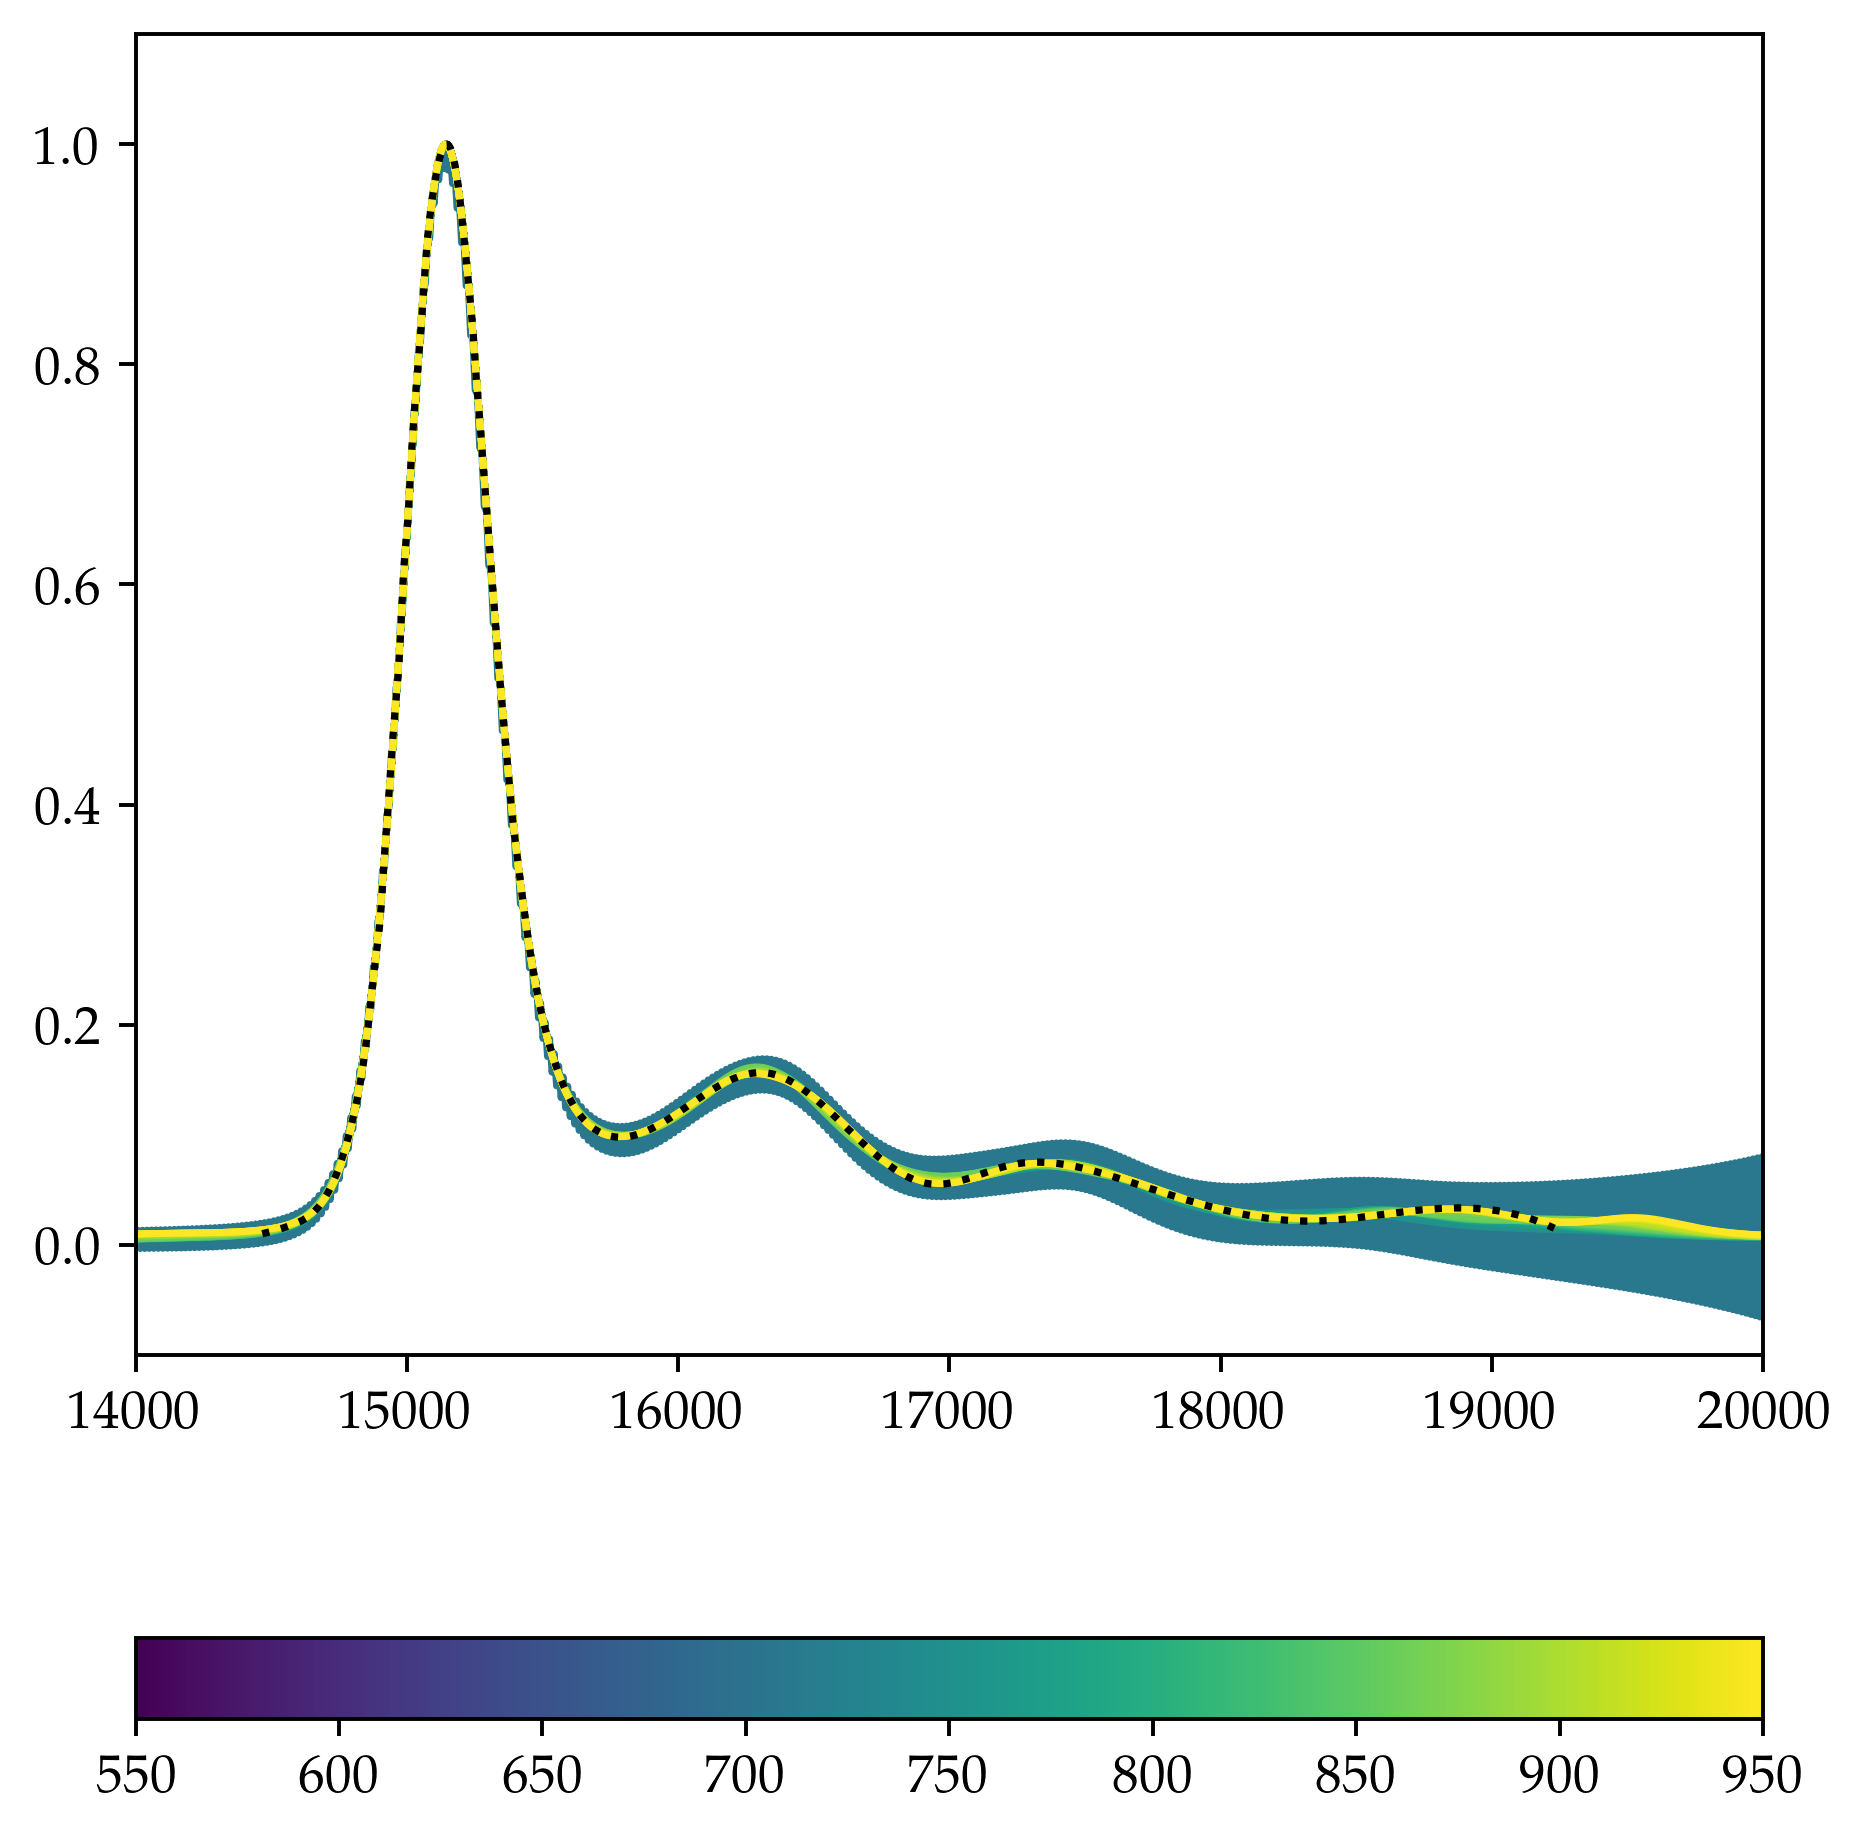

In [4]:
from matplotlib import cm
clm = cm.get_cmap('viridis', len(files))

fig, ax = plt.subplots(figsize=(6,7), dpi= 350)
labels = list()

for i, f in enumerate(sfiles[:]):
    filepath = os.path.join(path, f)
    optpars = spectre.utils.loadjson(filepath)
    datapath = filepath.replace('.json', '.npy')
    
    if os.path.isfile(datapath):
        data = np.load(datapath)
    else:
        syst, ta = spectre.full.init_system(optpars)
        spec = abss.calculate_abs_spectrum(syst, ta, optpars)
        spec.normalize()
        
        with qr.energy_units('1/cm'):
            data = np.vstack([spec.axis.data, spec.data])
            np.save(datapath, data)

    lab = f.split('.')[0].split('_')[2]
    plt.plot(data[0], data[1], label=lab, linewidth=1.4, color=clm(i))
    labels.append(lab)

plt.xlim(14000, 20000)
plt.ylim(-0.1, 1.1)
#plt.legend(frameon=False)

sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(labels[0], labels[-1]))
cbar = plt.colorbar(sm, orientation='horizontal')
#cbar.set_ticklabels(labs)

abss.plot_ref(ref_id, plot_to=ax, color='k', linestyle = 'dotted')

C:\Users\micha\AppData\Local\Temp\ipykernel_16988\3068091846.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  clm = cm.get_cmap('viridis', len(files))
C:\Users\micha\AppData\Local\Temp\ipykernel_16988\3068091846.py:17: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax0 = plt.subplot(gs[3])
 32%|██████████████████████████▉                                                          | 13/41 [00:20<00:00, 60.37it/s]C:\Users\micha\miniconda3\envs\py310-maya-1\lib\site-packages\scipy\interpolate\_fitpack2.py:298: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation 

0.0192760709806


Text(0, 0.5, 'residuum')

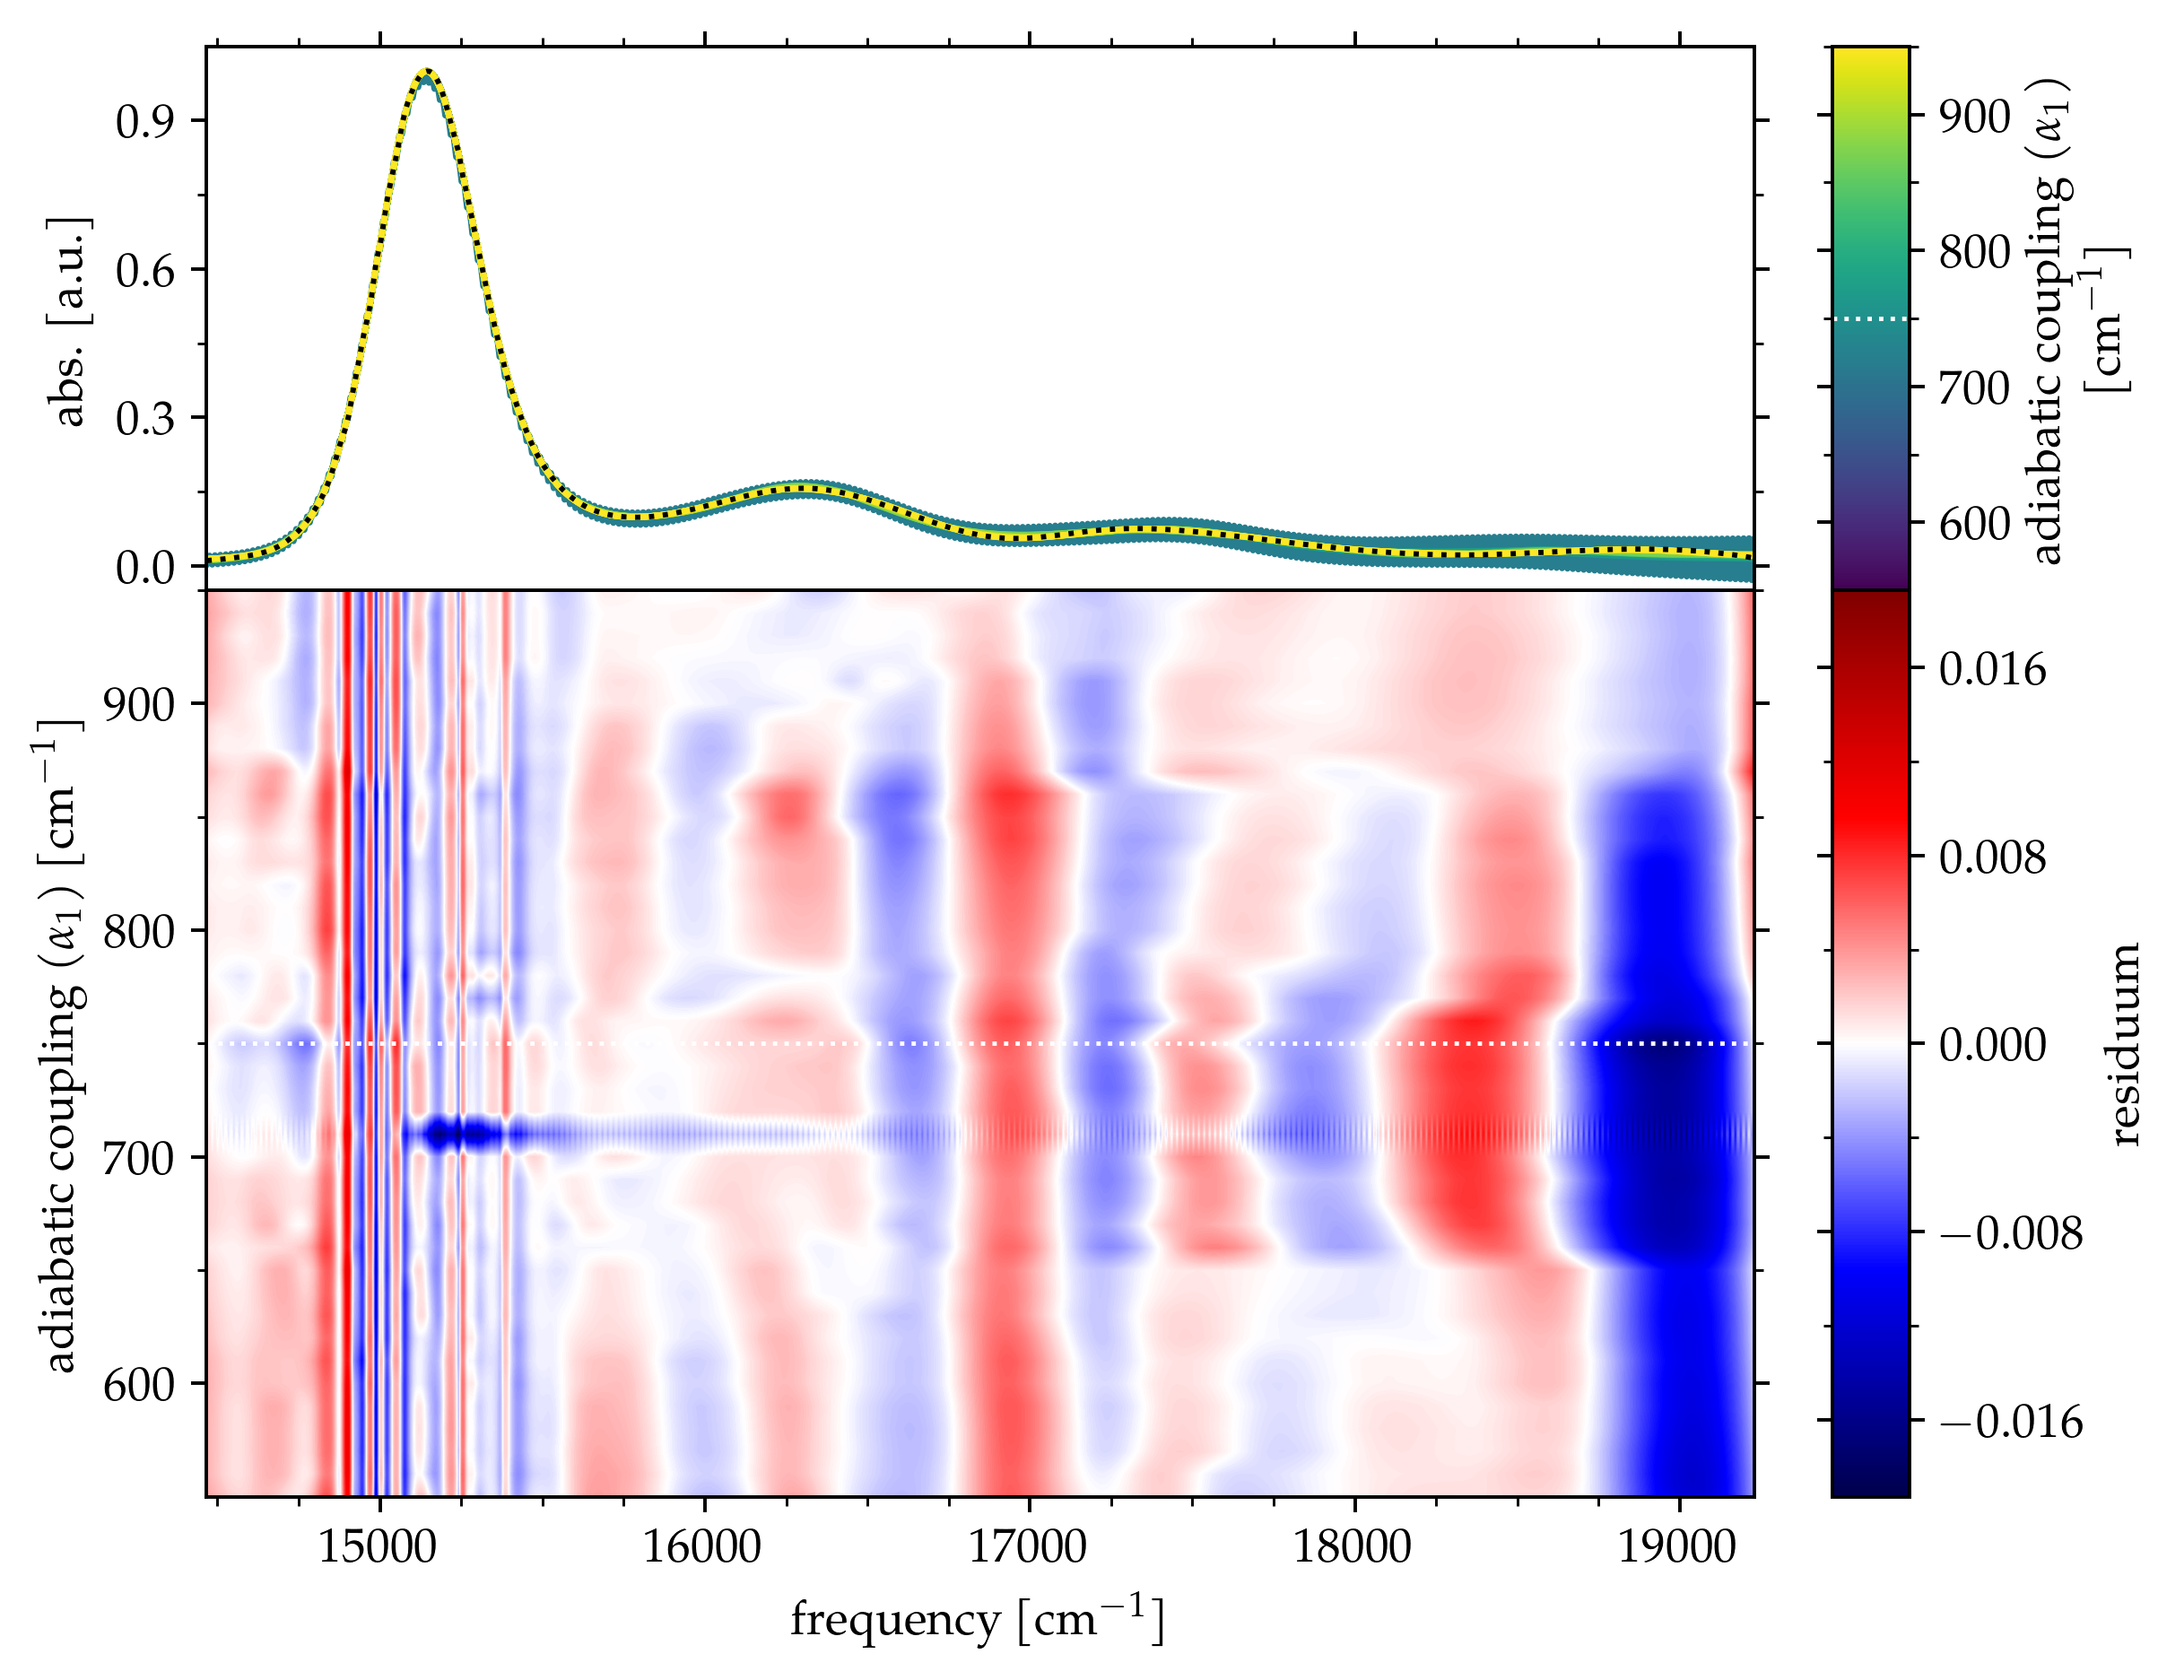

In [6]:
from matplotlib import cm
from scipy.interpolate import UnivariateSpline
from tqdm import tqdm
from matplotlib import gridspec

spline_s=0.0002
spline_k=3

clm = cm.get_cmap('viridis', len(files))

refdata = abss.plot_ref(ref_id, return_data='data', plot=False)
refx, refy = refdata

fig, ax = plt.subplots(num=None, figsize=(7,6), dpi=350, facecolor='w', edgecolor='k')
gs = gridspec.GridSpec(nrows=2, ncols=3, width_ratios=(1, 0.05, 0.05), height_ratios=(0.6, 1), figure=fig) 
#ax3 = plt.subplot(gs[3])
ax0 = plt.subplot(gs[3])
ax1 = plt.subplot(gs[0], sharex = ax0)
ax4 = plt.subplot(gs[5])
ax2 = plt.subplot(gs[2])
plt.subplots_adjust(hspace=0, wspace=0)

####################
#   ax1   #  # ax2 #
####################
#   ax0   #  # ax4 #
####################

all_data_filename = 'all_data.npy'
all_data_path = os.path.join(path, all_data_filename)

if os.path.isfile(all_data_path) and True:
    x, y, zdata = np.load(all_data_path)[:,:]

    for i, (xx,z) in enumerate(zip(x,zdata)):
        ax1.plot(xx, z, linewidth=1.4, color=clm(i))
    
    zax = zdata - refy

else:
    labels = list()
    zax = None
    zdata = None
    i = 0

    for f in tqdm(sfiles[:]):
        i += 1
        filepath = os.path.join(path, f)
        optpars = spectre.utils.loadjson(filepath)
        datapath = filepath.replace('.json', '.npy')
        
        if os.path.isfile(datapath):
            data = np.load(datapath)
        else:
            syst, ta = spectre.full.init_system(optpars)
            spec = abss.calculate_abs_spectrum(syst, ta, optpars)
            spec.normalize()
            
            with qr.energy_units('1/cm'):
                data = np.vstack([spec.axis.data, spec.data])
                np.save(datapath, data)
    
        lab = f.split('.')[0].split('_')[2]
        spline = UnivariateSpline(*data, k=spline_k, s=spline_s)
        ydat = spline(refx) - refy
        
        if zax is None:
            zax = ydat
            zdata = spline(refx)
        else:
            zax = np.vstack([zax, ydat])
            zdata = np.vstack([zdata, spline(refx)])
        
        ax1.plot(data[0], data[1], label=lab, linewidth=1.4, color=clm(i))
        labels.append(float(lab))

    yax = np.array(labels)
    xax = refx
    x, y = np.meshgrid(xax, yax)
    np.save(all_data_path, np.array([x, y, zdata]))

maximum = np.abs(zax).max()
print(maximum)

cf = ax0.contourf(x, y, zax, 500, cmap="seismic", vmax=maximum, vmin=-maximum)

sm = plt.cm.ScalarMappable(cmap='seismic', norm=plt.Normalize(-maximum, maximum))
cbar = plt.colorbar(sm, cax=ax4, orientation='vertical')

sm2 = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(y[0,0], y[-1,0]))
cbar2 = plt.colorbar(sm2, cax=ax2, orientation='vertical')

ax0.plot([x[0,0], x[0,-1]], [750,750], linewidth=1, linestyle='dotted', c='w')
ax2.plot([0, 1], [750,750], linewidth=1, linestyle='dotted', c='w')

abss.plot_ref(ref_id, plot_to=ax1, linestyle='dotted', c='k', linewidth=1.2)

from matplotlib.ticker import MultipleLocator, AutoMinorLocator, MaxNLocator

for g in [ax0, ax1, ax2, ax4]:
    pars = dict(labelbottom=False, labeltop=False, labelleft=True, labelright=False,
                bottom=True,           top=True,      left=True,      right=True,)
    g.tick_params(which='both', **pars)
    
    #g.xaxis.set_major_locator(MultipleLocator(20))
    #g.xaxis.set_major_formatter('{x:.0f}')
    #g.xaxis.set_minor_locator(MultipleLocator(10))
    g.yaxis.set_major_locator(MaxNLocator(nbins=4))
    g.yaxis.set_minor_locator(AutoMinorLocator(2))
    g.xaxis.set_minor_locator(AutoMinorLocator(4))
    #g.ticklabel_format(style='sci', axis='y', scilimits=(-1,3), useOffset=True)

    #g.get_yaxis().set_offset_position("left")
    #g.get_yaxis().OFFSETTEXTPAD = 7
    #g.get_yaxis().get_offset_text().set_position((-0.097,0))

ax4.yaxis.set_major_locator(MaxNLocator(nbins=5))

ax0.tick_params(which='both', labelbottom=True, labelleft=True)
ax1.tick_params(which='both', bottom=False)
ax2.tick_params(which='both', labelleft=False, labelright=True)
ax4.tick_params(which='both', labelleft=False, labelright=True)

ax0.set_xlim(x[0,0], x[0,-1])
ax0.set_ylim(y[0,0], y[-1,0])
ax1.set_ylim(-0.05, 1.05)

ax0.set_xlabel(r'frequency [cm$^{-1}$]')
ax0.set_ylabel(r'adiabatic coupling ($\alpha_1$) [cm$^{-1}$]')
ax1.set_ylabel(r'abs. [a.u.]')
ax2.set_ylabel(r'\parbox{40mm}{\centering adiabatic coupling ($\alpha_1$) [cm$^{-1}$]}')
ax4.set_ylabel(r'residuum')

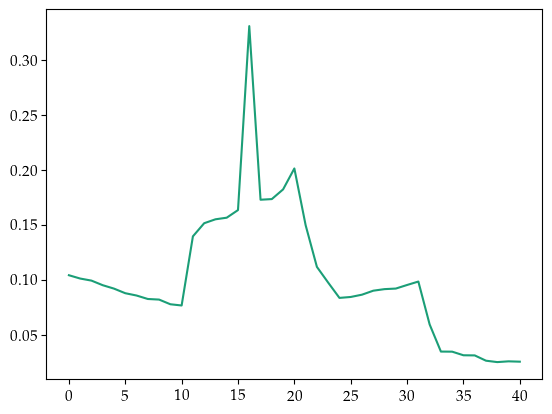

In [8]:
plt.plot((zax**2).sum(axis=1))

In [9]:
def draw_line(plot_to, xaxis, *vals, **pars):
    for val in vals:
        plot_to.plot([xaxis[0]-10, xaxis[-1]+10], [val, val], **pars)

C:\Users\micha\AppData\Local\Temp\ipykernel_16988\108035436.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  clm = cm.get_cmap('viridis', len(files))


Text(0.5, 0, 'adiabatic coupling ($\\alpha_1$) [cm$^{-1}$]')

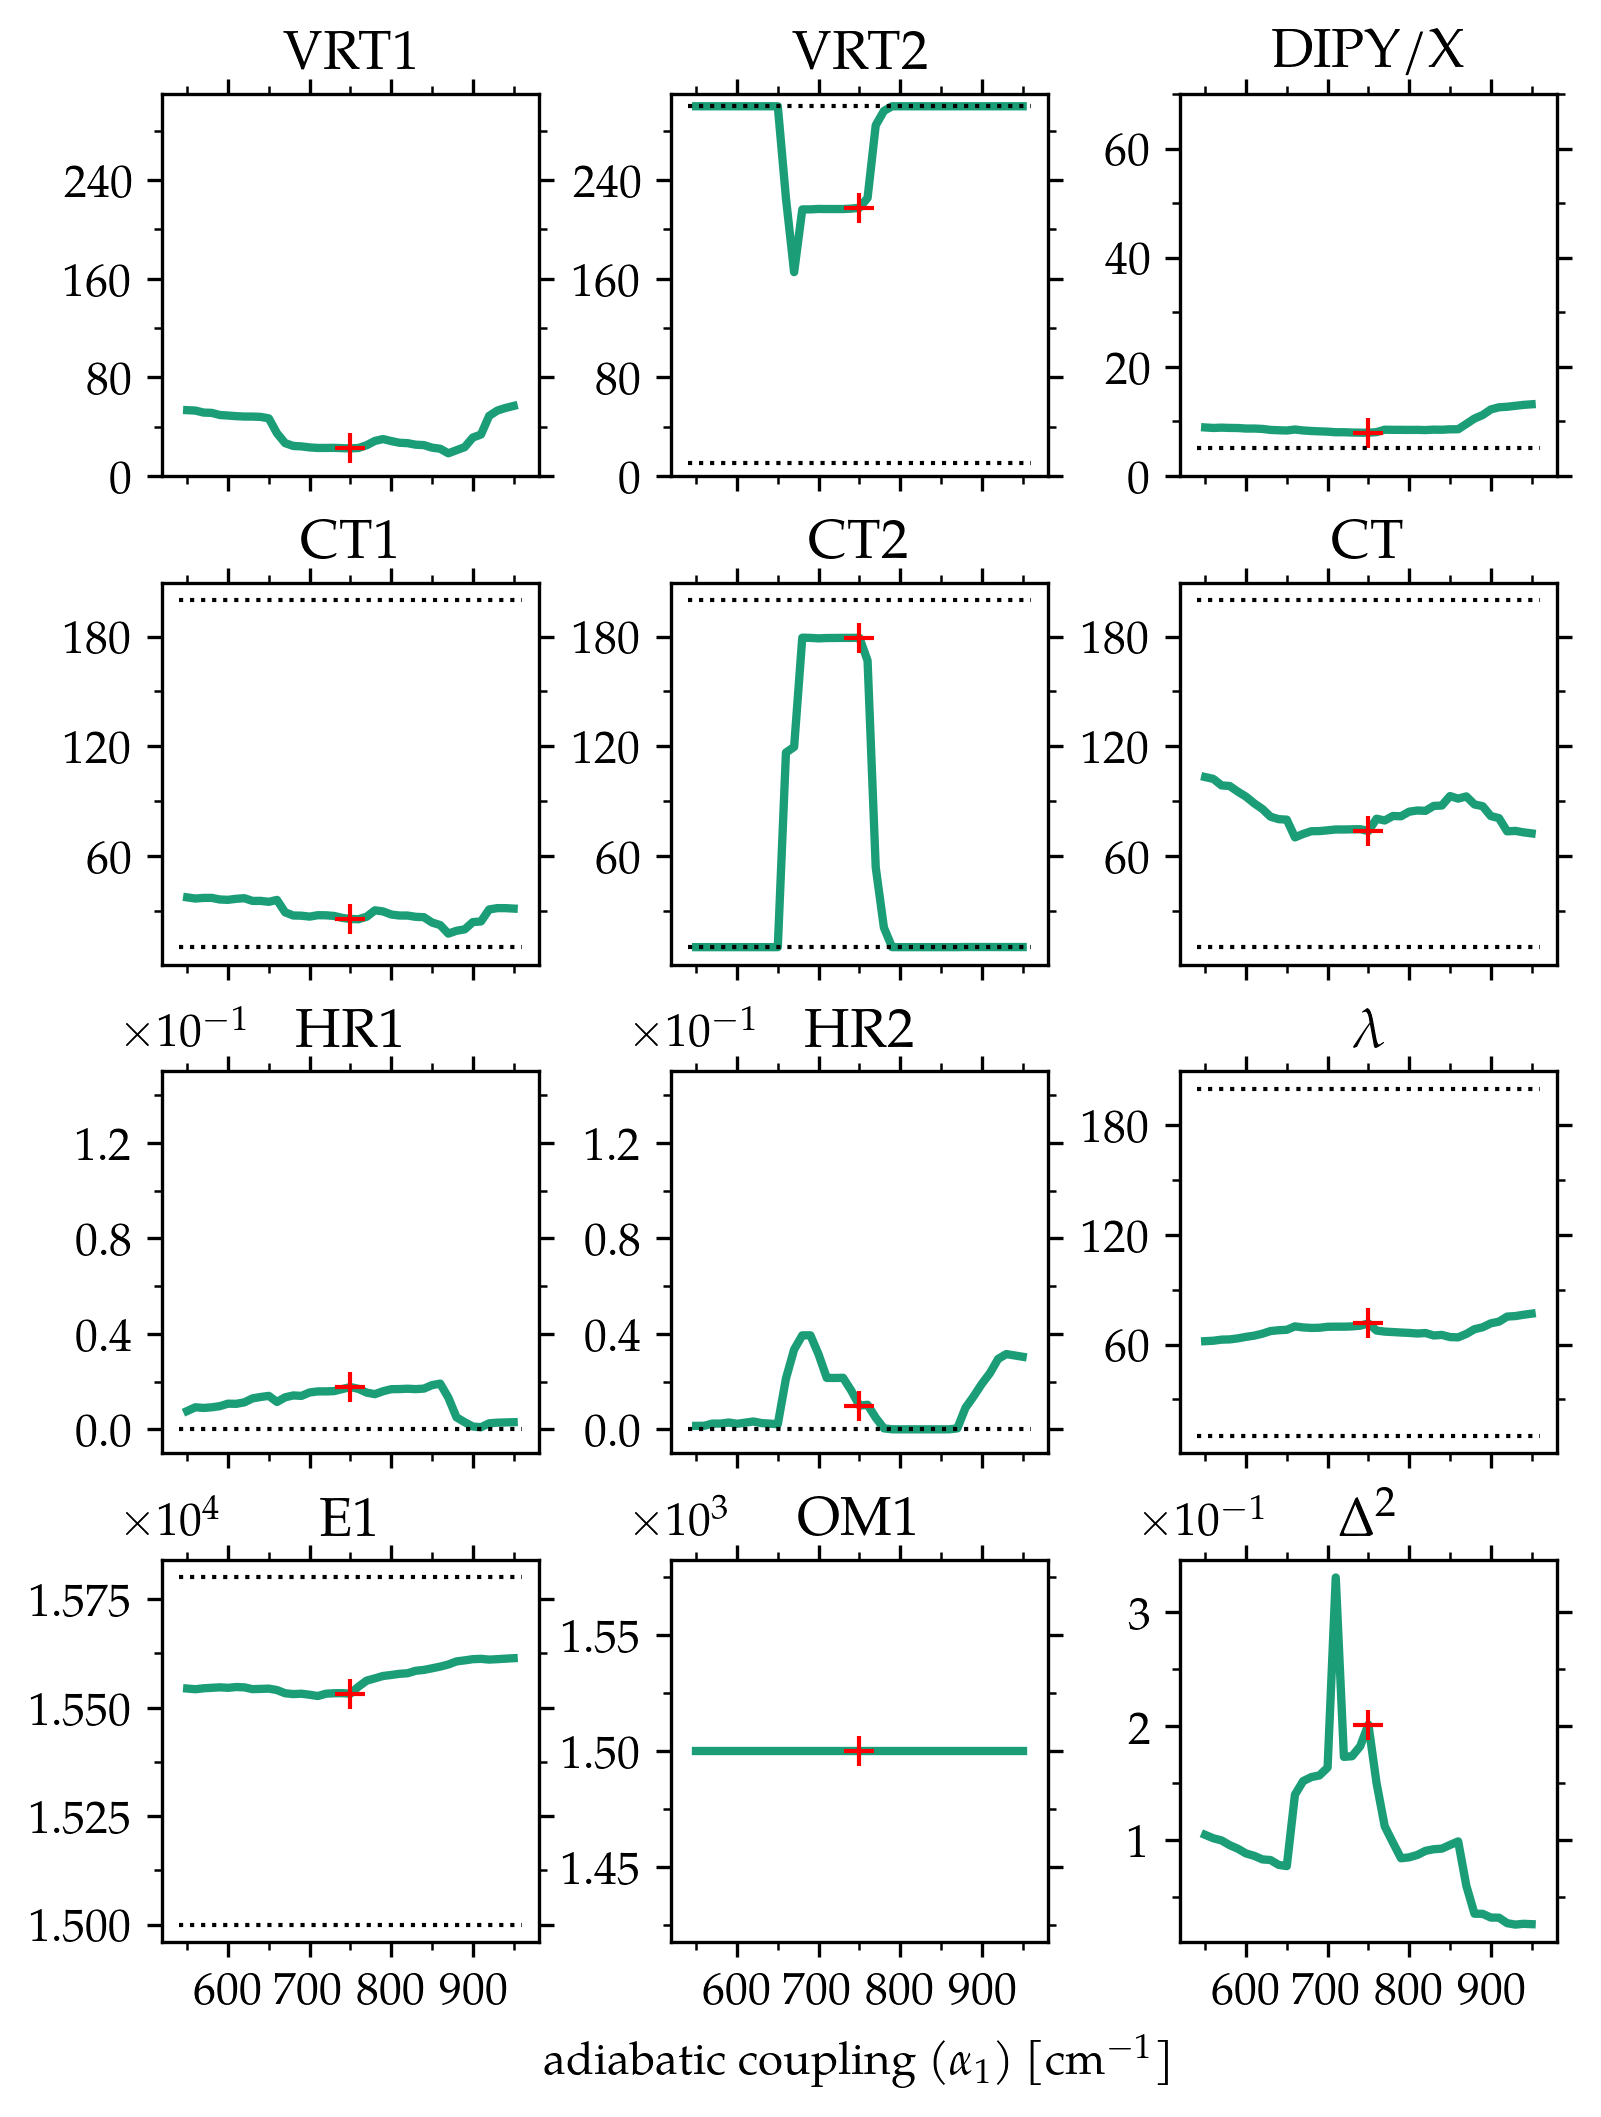

In [10]:
from matplotlib import cm
from spectre.matplotlib_latex import plt_latex, format_ticks

plt_latex()
clm = cm.get_cmap('viridis', len(files))

fig, grid = plt.subplots(4, 3, figsize=(6,8), dpi=300, sharex=True, facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace=0.28, wspace=0.35)

labels = list()

tt11 = list()
tt12 = list()
dipyx = list()
ct11 = list()
ct12 = list()
ct = list()
lamb = list()
hr11 = list()
hr12 = list()
e1 = list()
de = list()
om1 = list()
alpha = list()

for i, f in enumerate(sfiles[:]):
    filepath = os.path.join(path, f)
    optpars = spectre.utils.loadjson(filepath)
    datapath = filepath.replace('.json', '.npy')
    
    if os.path.isfile(datapath):
        data = np.load(datapath)
    else:
        syst, ta = spectre.full.init_system(optpars)
        spec = abss.calculate_abs_spectrum(syst, ta, optpars)
        spec.normalize()
        
        with qr.energy_units('1/cm'):
            data = np.vstack([spec.axis.data, spec.data])
            np.save(datapath, data)

    lab = f.split('.')[0].split('_')[2]
    labels.append(float(lab))

    tt11.append(optpars['scaled_OB_CF_vib_11']['target_time'])
    tt12.append(optpars['scaled_OB_CF_vib_12']['target_time'])
    dipyx.append(4.5**2 / optpars['dipx'][0]**2)
    ct11.append(optpars['scaled_OB_CF_vib_11']['cortime'])
    ct12.append(optpars['scaled_OB_CF_vib_12']['cortime'])
    ct.append(optpars['spectral_density_el']['cortime'])
    lamb.append(optpars['spectral_density_el']['reorg'])
    hr11.append(optpars['hr1'][0])
    hr12.append(optpars['hr1'][1])
    e1.append(optpars['energies'][1])
    de.append(optpars['energies'][2] - optpars['energies'][1])
    om1.append(optpars['omega'][0])
    alpha.append(optpars['dia_alpha1'])

#labels = labels[13:]
ii = [i for i,x in enumerate(labels) if x == 750][0]

### Line & marker parameters
pars = dict(linewidth=2, )
mpars = dict(marker='+', c='r', markersize=7)
lpars = dict(linewidth=1, linestyle='dotted', c='k')


## TT11
grid[0,0].plot(labels, tt11, **pars)
grid[0,0].plot(labels[ii], tt11[ii], **mpars)
grid[0,0].set_title('VRT1')

## TT12
grid[0,1].plot(labels, tt12, **pars)
grid[0,1].plot(labels[ii], tt12[ii], **mpars)
grid[0,1].set_title('VRT2')
draw_line(grid[0,1], labels, 10, 300, **lpars)
          
## DIP Y/X
grid[0,2].plot(labels, dipyx, **pars)
grid[0,2].plot(labels[ii], dipyx[ii], **mpars)
grid[0,2].set_title('DIPY/X')
draw_line(grid[0,2], labels, 4.5**2 / 0.2**2, 4.5**2 / 2**2, **lpars)

## CT11
grid[1,0].plot(labels, ct11, **pars)
grid[1,0].plot(labels[ii], ct11[ii], **mpars)
grid[1,0].set_title('CT1')
draw_line(grid[1,0], labels, 10, 200, **lpars)

## CT12
grid[1,1].plot(labels, ct12, **pars)
grid[1,1].plot(labels[ii], ct12[ii], **mpars)
grid[1,1].set_title('CT2')
draw_line(grid[1,1], labels, 10, 200, **lpars)

## CT
grid[1,2].plot(labels, ct, **pars)
grid[1,2].plot(labels[ii], ct[ii], **mpars)
grid[1,2].set_title('CT')
draw_line(grid[1,2], labels, 10, 200, **lpars)

## HR11
grid[2,0].plot(labels, hr11, **pars)
grid[2,0].plot(labels[ii], hr11[ii], **mpars)
grid[2,0].set_title('HR1')
draw_line(grid[2,0], labels, 0.00001, 0.4, **lpars)

## HR12
grid[2,1].plot(labels, hr12, **pars)
grid[2,1].plot(labels[ii], hr12[ii], **mpars)
grid[2,1].set_title('HR2')
draw_line(grid[2,1], labels, 0.00001, 0.4, **lpars)

## lambda
grid[2,2].plot(labels, lamb, **pars)
grid[2,2].plot(labels[ii], lamb[ii], **mpars)
grid[2,2].set_title(r'$\lambda$')
draw_line(grid[2,2], labels, 10, 200, **lpars)

## e1
grid[3,0].plot(labels, e1, **pars)
grid[3,0].plot(labels[ii], e1[ii], **mpars)
grid[3,0].set_title('E1')
draw_line(grid[3,0], labels, 15000, 15800, **lpars)

## omega
grid[3,1].plot(labels, om1, **pars)
grid[3,1].plot(labels[ii], om1[ii], **mpars)
grid[3,1].set_title('OM1')
#draw_line(grid[3,1], labels, 0.00001, 0.4, **lpars)

# ## alpha
# grid[3,2].plot(labels, alpha, **pars)
# grid[3,2].plot(labels[ii], alpha[ii], **mpars)
# grid[3,2].set_title(r'$\alpha$')
# #draw_line(grid[3,2], labels, 0.00001, 0.4, **lpars)

## alpha
delta = (zax**2).sum(axis=1)
grid[3,2].plot(labels, delta, **pars)
grid[3,2].plot(labels[ii], delta[ii], **mpars)
grid[3,2].set_title(r'$\Delta^2$')
#draw_line(grid[3,2], labels, 0.00001, 0.4, **lpars)
    


grid[0,0].set_ylim(0,310)
grid[0,1].sharey(grid[0,0])
# grid[0,1].set_ylim(0,250)

#grid[1,0].set_ylim(0,100)
grid[1,1].sharey(grid[1,0])
grid[1,2].sharey(grid[1,0])
# grid[1,1].set_ylim(0,100)
# grid[1,2].set_ylim(0,100)

grid[2,0].set_ylim(-0.01, 0.15)
grid[2,1].sharey(grid[2,0])
# grid[2,1].set_ylim(-0.01, 0.075)

#grid[0,0].set_xlim(10, 80)
grid[0,2].set_ylim(0,70)

#plt.xlim(14000, 20000)
#plt.ylim(-0.1, 1.1)
#plt.legend(frameon=False)

#sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(labels[0], labels[-1]))
#cbar = plt.colorbar(sm, orientation='horizontal')
#cbar.set_ticklabels(labs)

### TICKS
from matplotlib.ticker import MultipleLocator, AutoMinorLocator, MaxNLocator

for g in grid[:].flatten():
    pars = dict(labelbottom=False, labeltop=False, labelleft=True, labelright=False,
                bottom=True,           top=True,      left=True,      right=True,)
    #minor_pars = dict(bottom=True,           top=True,      left=True,      right=True)
    g.tick_params(which='both', **pars)
    #g.minor_tick_params(**minor_pars)
    
    g.xaxis.set_major_locator(MultipleLocator(100))
    g.xaxis.set_major_formatter('{x:.0f}')
    g.xaxis.set_minor_locator(MultipleLocator(50))
    g.yaxis.set_major_locator(MaxNLocator(nbins=4))
    g.yaxis.set_minor_locator(AutoMinorLocator(2))
    g.ticklabel_format(style='sci', axis='y', scilimits=(-1,3), useOffset=True)

    g.get_yaxis().set_offset_position("left")
    g.get_yaxis().OFFSETTEXTPAD = 7
    #g.get_yaxis().get_offset_text().set_position((-0.032,0))
    g.get_yaxis().get_offset_text().set_position((-0.097,0))

for g in grid[-1].flatten():
    pars = dict(labelbottom=True, labeltop=False, labelleft=True, labelright=False)
    g.tick_params(which='both', **pars)

# plt.locator_params(axis='x', nbins=4)
# plt.locator_params(axis='y', nbins=4)
#fig.tight_layout()

grid[3,1].set_xlabel(r'adiabatic coupling ($\alpha_1$) [cm$^{-1}$]')

# (2.) - larger system - 166

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import sys, os
sys.path.insert(1, '../quantarhei')
sys.path.insert(2, '../spectre')
import quantarhei as qr
import spectre
import spectre.full as sef
import spectre.spectroscopy.abs_spectroscopy as abss

In [2]:
#path = "C:/Users/micha/Documents/Studium/MScThesis/data-meta/F-scanopt-ether02-1mode-free/results_F-ether02-1mode-free-s5-P-11010_scanopt_01_2023-07-08_14-00-56"
path = "C:/Users/micha/Documents/Studium/MScThesis/data-meta-2modes/F-scanopt-ether02-2modes/job_16629731.meta-pbs.metacentrum.cz"

In [3]:
files = [file for file in os.listdir(path) if file.endswith('.json') and file.startswith('opt')]
sfiles = sorted(files, key=lambda s: float(s.split('.')[0].split('_')[2]))

ref_id = 2

C:\Users\micha\AppData\Local\Temp\ipykernel_28556\124280080.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  clm = cm.get_cmap('viridis', len(files))


Reorg: 798.728369364
Reorg: 164.249398656
Reorg: 443.191294176
Reorg: 112.864097137
System init: 9.73s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:  6.6min finished


Tensor calculation: 55.61s
Spectrum calculation (CPU): 7min 36s


C:\Users\micha\AppData\Local\Temp\ipykernel_28556\124280080.py:34: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, orientation='horizontal')


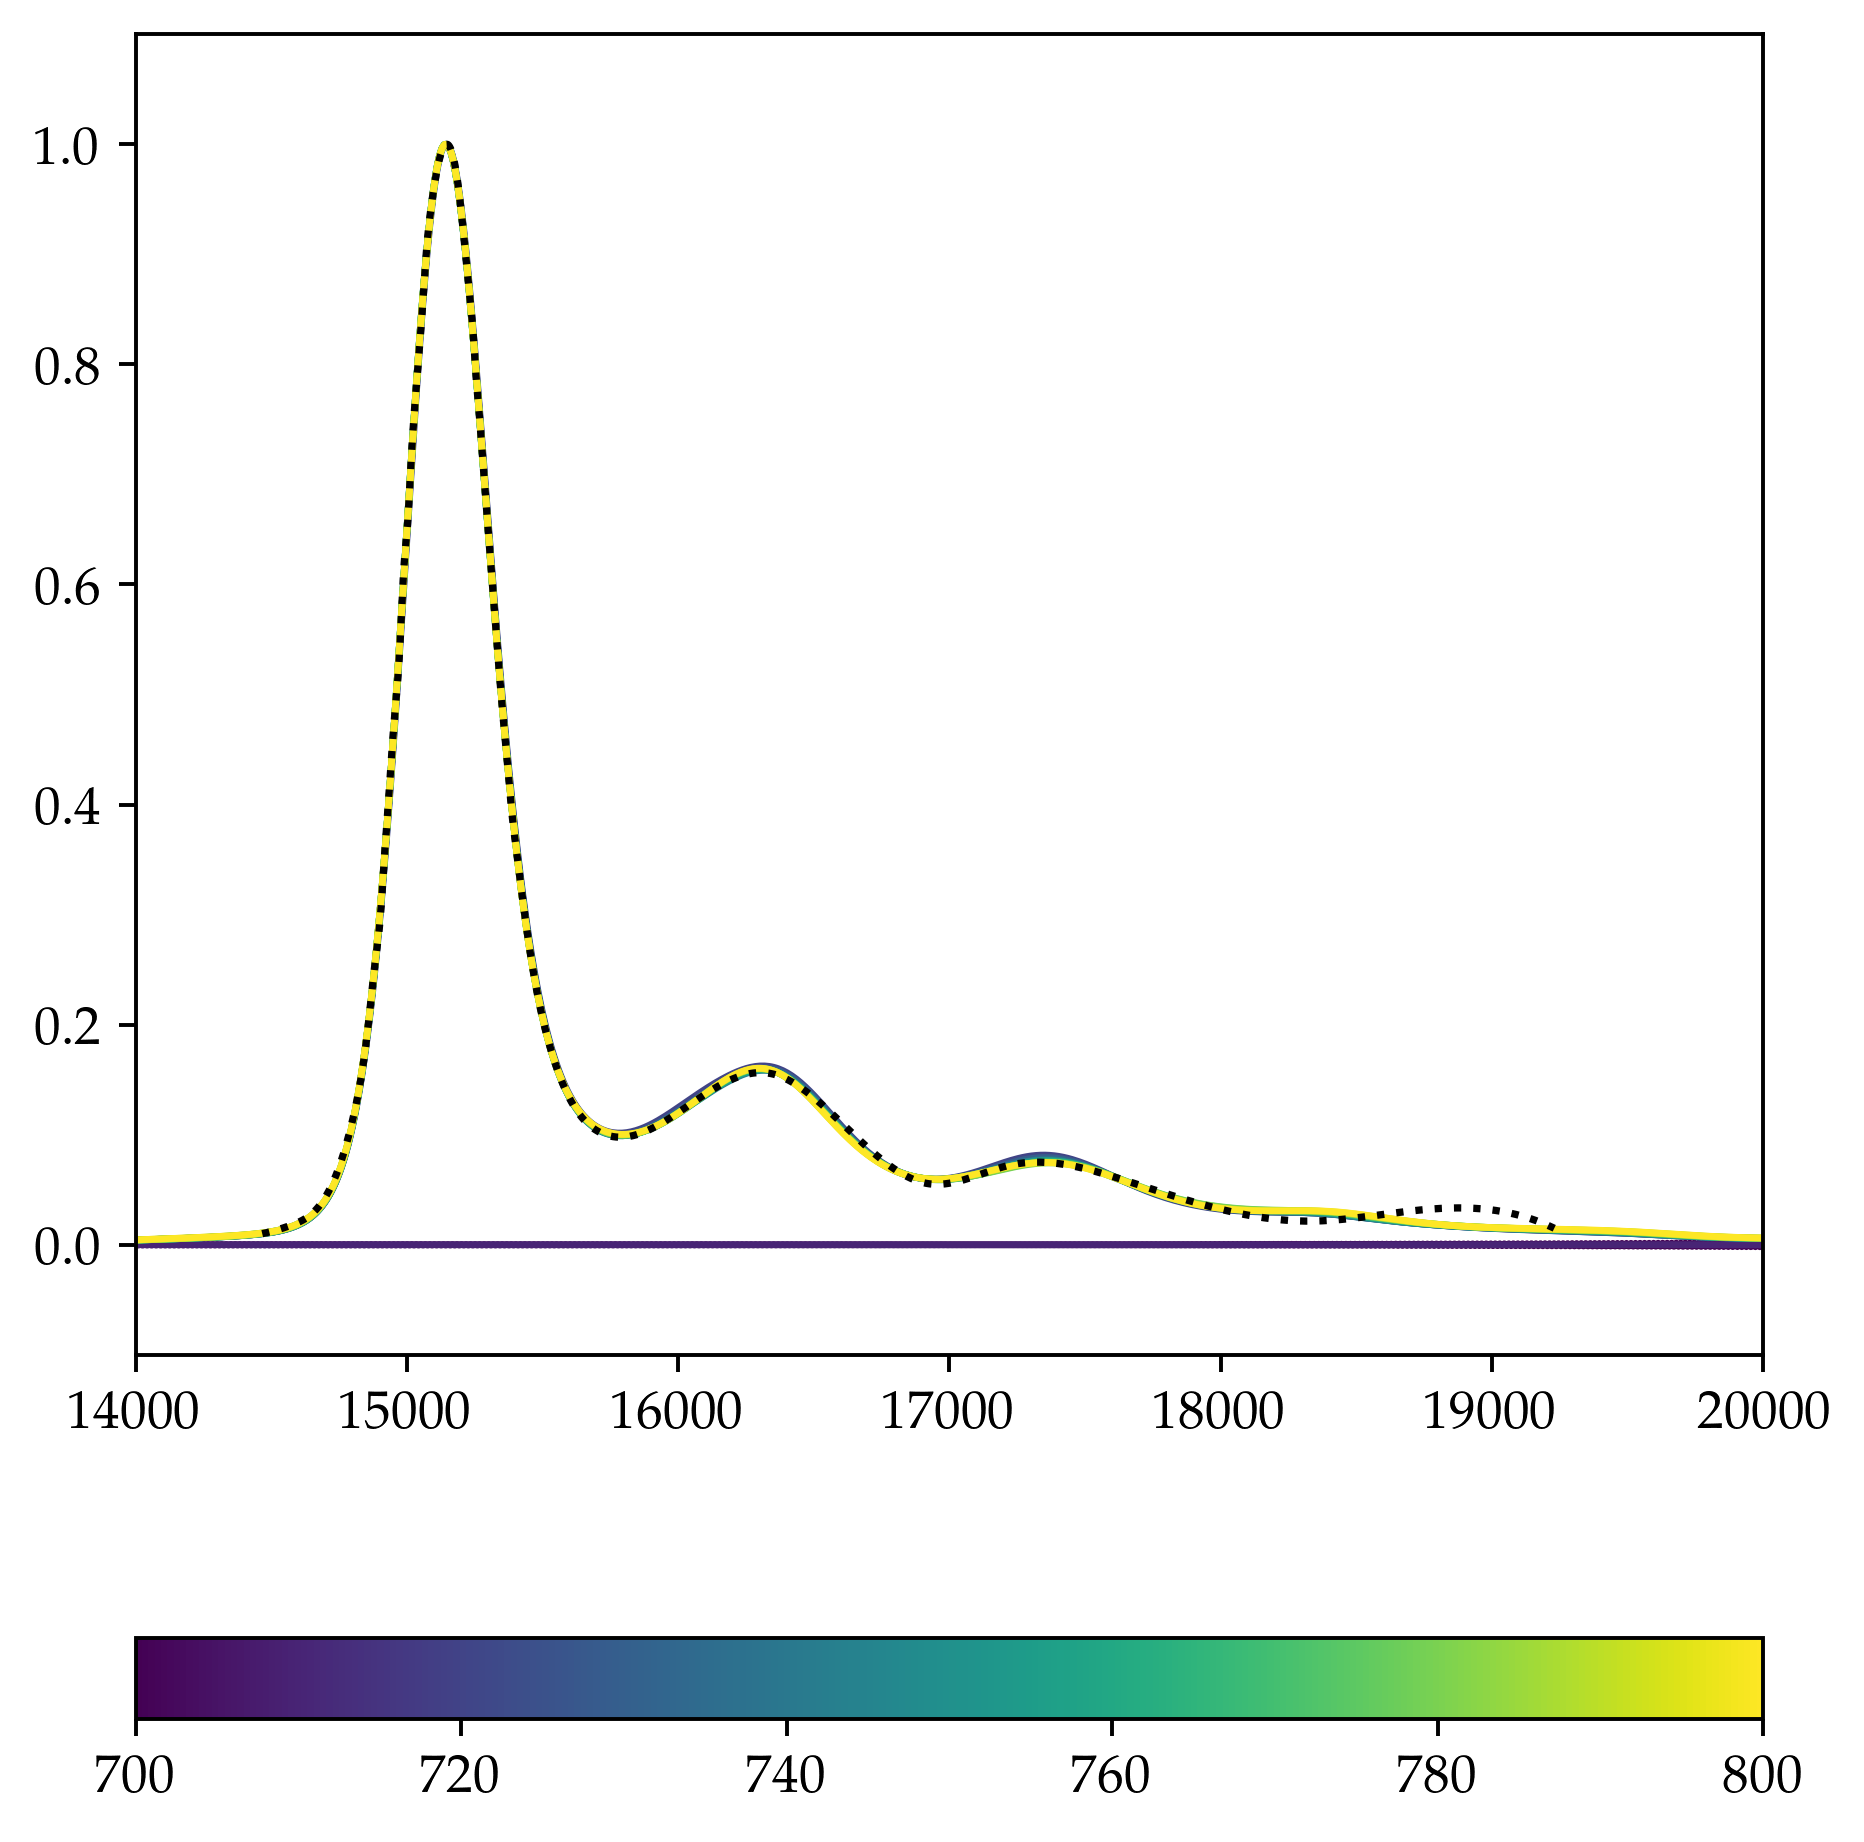

In [4]:
from matplotlib import cm
import gc
clm = cm.get_cmap('viridis', len(files))

fig, ax = plt.subplots(figsize=(6,7), dpi= 350)
labels = list()

for i, f in enumerate(sfiles[:]):
    filepath = os.path.join(path, f)
    optpars = spectre.utils.loadjson(filepath)
    datapath = filepath.replace('.json', '.npy')
    
    if os.path.isfile(datapath):
        data = np.load(datapath)
    else:
        syst, ta = spectre.full.init_system(optpars)
        spec = abss.calculate_abs_spectrum(syst, ta, optpars)
        spec.normalize()
        
        with qr.energy_units('1/cm'):
            data = np.vstack([spec.axis.data, spec.data])
            np.save(datapath, data)

    lab = f.split('.')[0].split('_')[2]
    plt.plot(data[0], data[1], label=lab, linewidth=1.4, color=clm(i))
    labels.append(lab)
    gc.collect()

plt.xlim(14000, 20000)
plt.ylim(-0.1, 1.1)
#plt.legend(frameon=False)

sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(labels[0], labels[-1]))
cbar = plt.colorbar(sm, orientation='horizontal')
#cbar.set_ticklabels(labs)

abss.plot_ref(ref_id, plot_to=ax, color='k', linestyle = 'dotted')

C:\Users\micha\AppData\Local\Temp\ipykernel_28556\1322340509.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  clm = cm.get_cmap('viridis', len(files))
C:\Users\micha\AppData\Local\Temp\ipykernel_28556\1322340509.py:17: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax0 = plt.subplot(gs[3])
100%|█████████████████████████████████████████████████████████████████████████████████████| 11/11 [00:13<00:00,  1.19s/it]


1.00000000059


Text(0, 0.5, 'residuum')

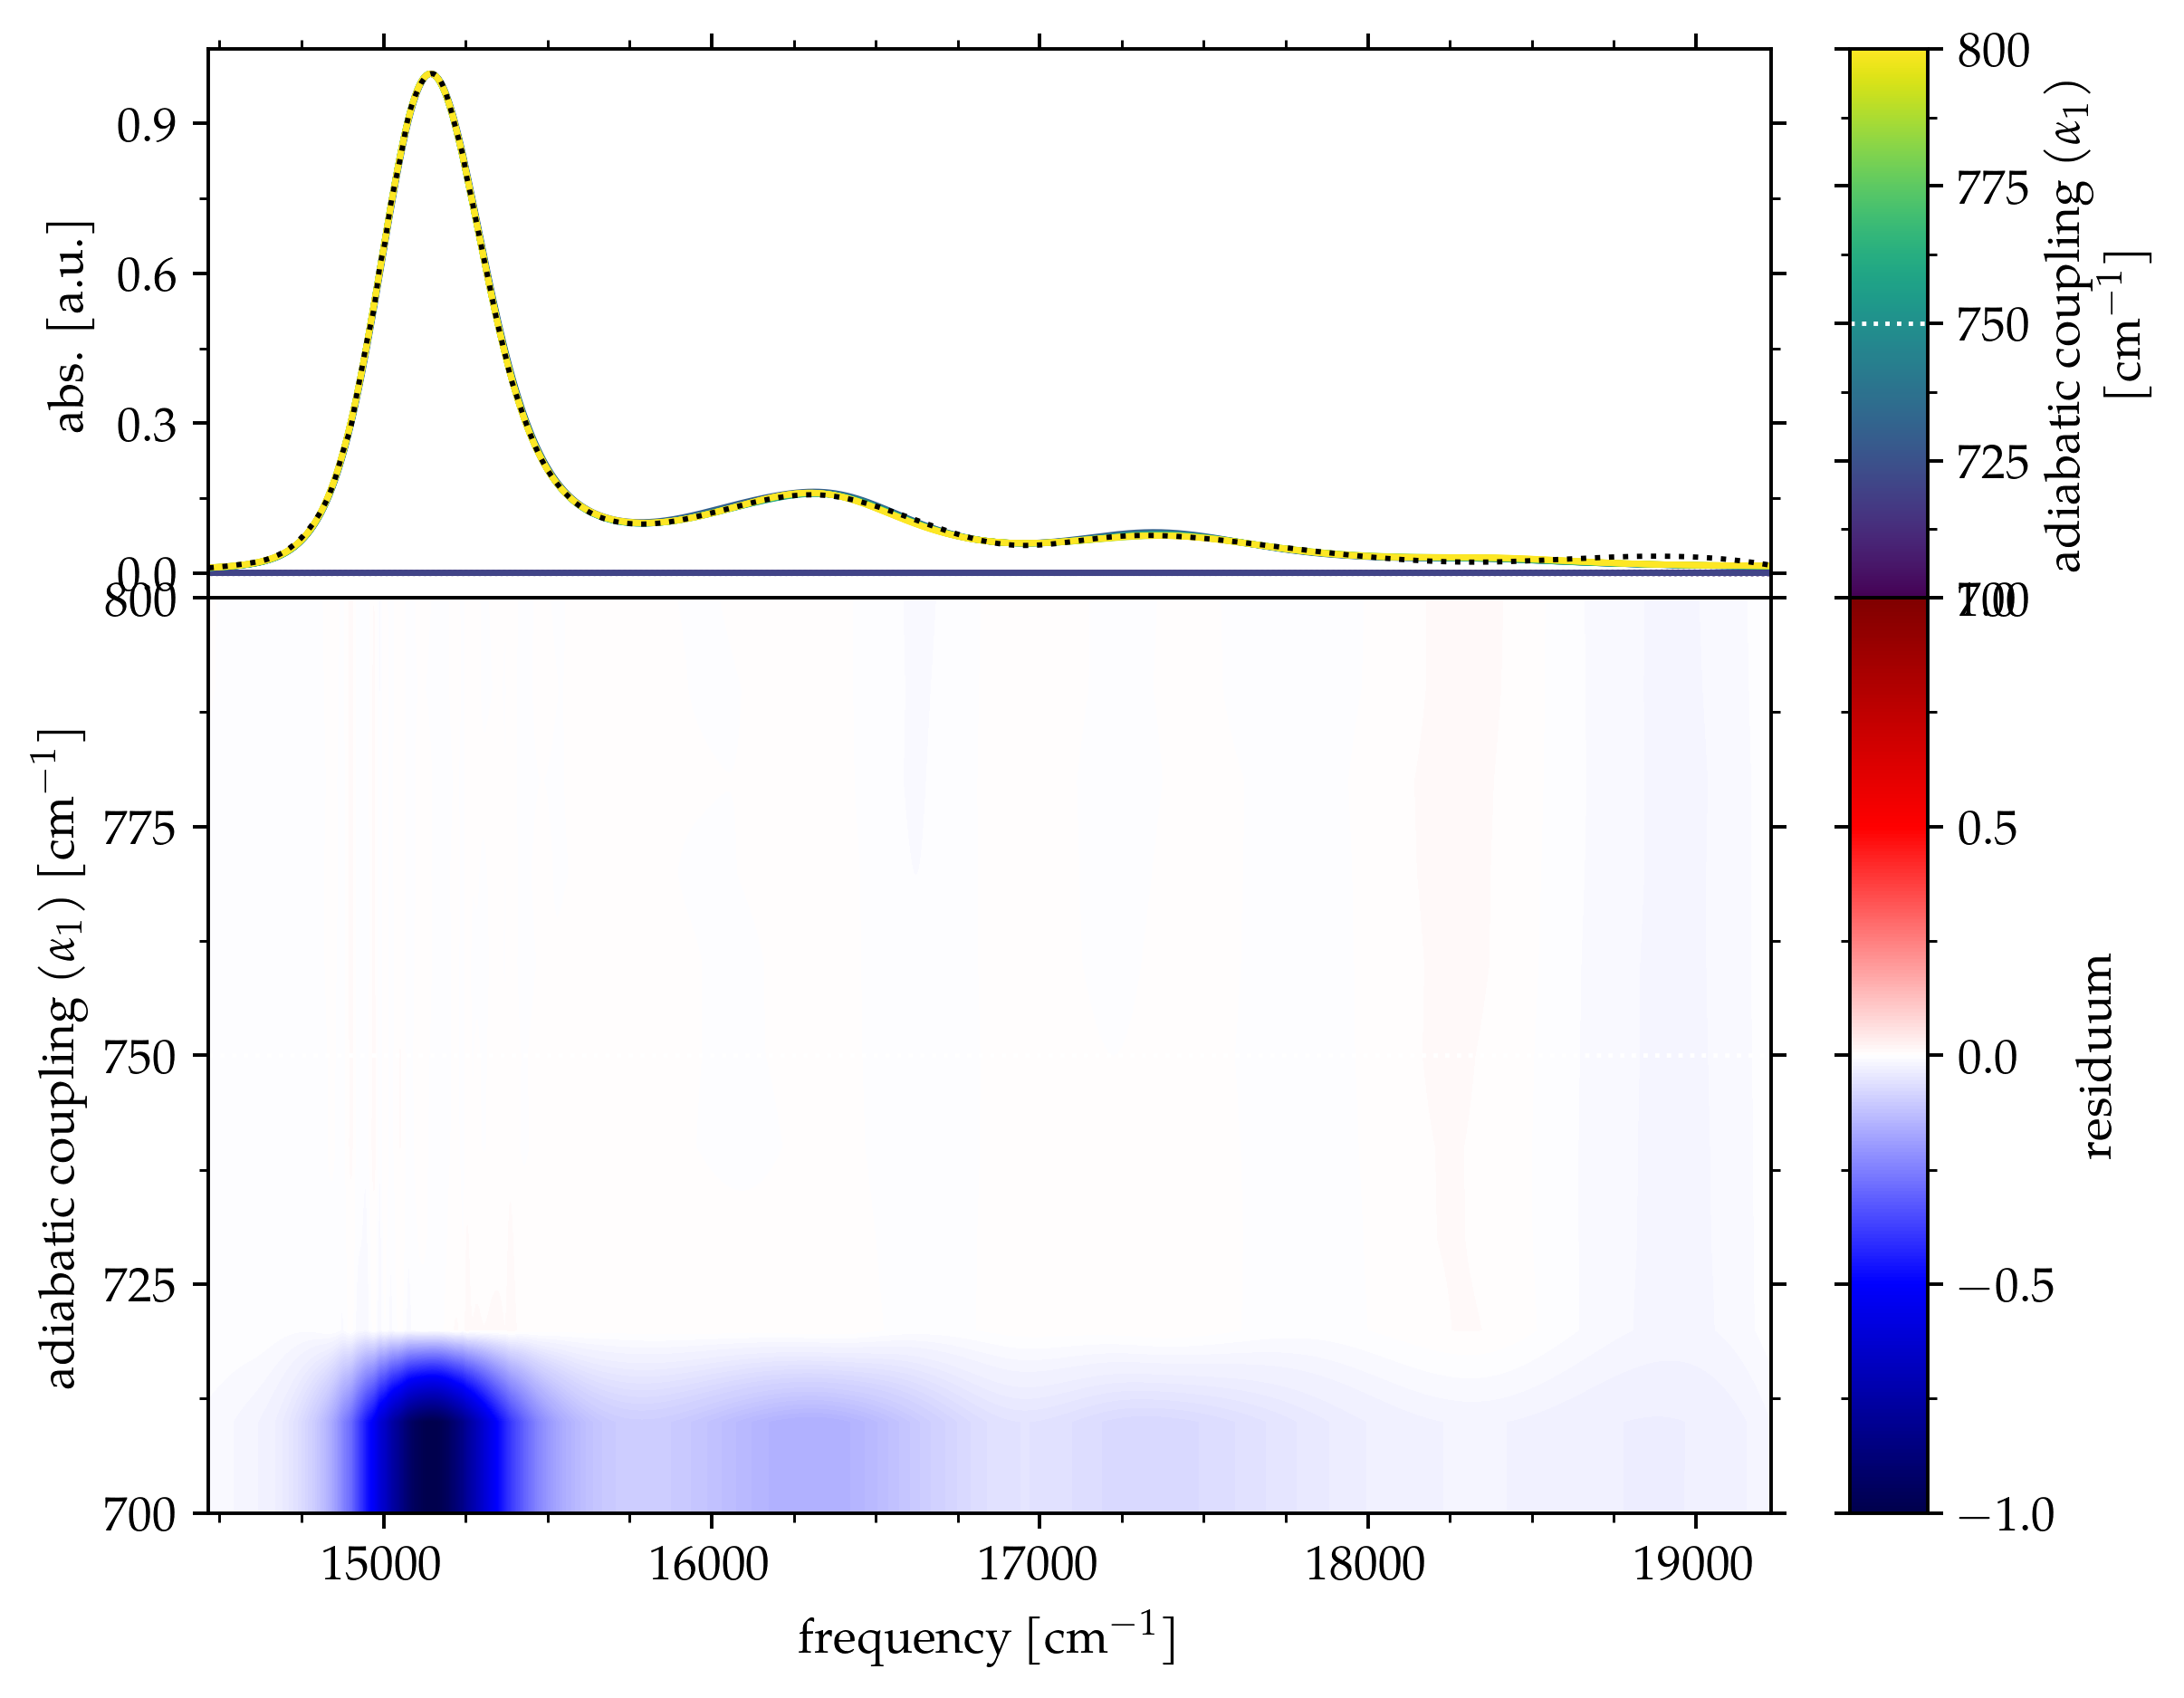

In [5]:
from matplotlib import cm
from scipy.interpolate import UnivariateSpline
from tqdm import tqdm
from matplotlib import gridspec

spline_s=0.0002
spline_k=3

clm = cm.get_cmap('viridis', len(files))

refdata = abss.plot_ref(ref_id, return_data='data', plot=False)
refx, refy = refdata

fig, ax = plt.subplots(num=None, figsize=(7,6), dpi=350, facecolor='w', edgecolor='k')
gs = gridspec.GridSpec(nrows=2, ncols=3, width_ratios=(1, 0.05, 0.05), height_ratios=(0.6, 1), figure=fig) 
#ax3 = plt.subplot(gs[3])
ax0 = plt.subplot(gs[3])
ax1 = plt.subplot(gs[0], sharex = ax0)
ax4 = plt.subplot(gs[5])
ax2 = plt.subplot(gs[2])
plt.subplots_adjust(hspace=0, wspace=0)

####################
#   ax1   #  # ax2 #
####################
#   ax0   #  # ax4 #
####################

all_data_filename = 'all_data.npy'
all_data_path = os.path.join(path, all_data_filename)

if os.path.isfile(all_data_path) and True:
    x, y, zdata = np.load(all_data_path)[:,3:-8]

    for i, (xx,z) in enumerate(zip(x,zdata)):
        ax1.plot(xx, z, linewidth=1.4, color=clm(i))
    
    zax = zdata - refy

else:
    labels = list()
    zax = None
    zdata = None
    i = 0

    for f in tqdm(sfiles[:]):
        i += 1
        filepath = os.path.join(path, f)
        optpars = spectre.utils.loadjson(filepath)
        datapath = filepath.replace('.json', '.npy')
        
        if os.path.isfile(datapath):
            data = np.load(datapath)
        else:
            syst, ta = spectre.full.init_system(optpars)
            spec = abss.calculate_abs_spectrum(syst, ta, optpars)
            spec.normalize()
            
            with qr.energy_units('1/cm'):
                data = np.vstack([spec.axis.data, spec.data])
                np.save(datapath, data)
    
        lab = f.split('.')[0].split('_')[2]
        spline = UnivariateSpline(*data, k=spline_k, s=spline_s)
        ydat = spline(refx) - refy
        
        if zax is None:
            zax = ydat
            zdata = spline(refx)
        else:
            zax = np.vstack([zax, ydat])
            zdata = np.vstack([zdata, spline(refx)])
        
        ax1.plot(data[0], data[1], label=lab, linewidth=1.4, color=clm(i))
        labels.append(float(lab))

    yax = np.array(labels)
    xax = refx
    x, y = np.meshgrid(xax, yax)
    np.save(all_data_path, np.array([x, y, zdata]))

maximum = np.abs(zax).max()
print(maximum)

cf = ax0.contourf(x, y, zax, 500, cmap="seismic", vmax=maximum, vmin=-maximum)

sm = plt.cm.ScalarMappable(cmap='seismic', norm=plt.Normalize(-maximum, maximum))
cbar = plt.colorbar(sm, cax=ax4, orientation='vertical')

sm2 = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(y[0,0], y[-1,0]))
cbar2 = plt.colorbar(sm2, cax=ax2, orientation='vertical')

ax0.plot([x[0,0], x[0,-1]], [750,750], linewidth=1, linestyle='dotted', c='w')
ax2.plot([0, 1], [750,750], linewidth=1, linestyle='dotted', c='w')

abss.plot_ref(ref_id, plot_to=ax1, linestyle='dotted', c='k', linewidth=1.2)

from matplotlib.ticker import MultipleLocator, AutoMinorLocator, MaxNLocator

for g in [ax0, ax1, ax2, ax4]:
    pars = dict(labelbottom=False, labeltop=False, labelleft=True, labelright=False,
                bottom=True,           top=True,      left=True,      right=True,)
    g.tick_params(which='both', **pars)
    
    #g.xaxis.set_major_locator(MultipleLocator(20))
    #g.xaxis.set_major_formatter('{x:.0f}')
    #g.xaxis.set_minor_locator(MultipleLocator(10))
    g.yaxis.set_major_locator(MaxNLocator(nbins=4))
    g.yaxis.set_minor_locator(AutoMinorLocator(2))
    g.xaxis.set_minor_locator(AutoMinorLocator(4))
    #g.ticklabel_format(style='sci', axis='y', scilimits=(-1,3), useOffset=True)

    #g.get_yaxis().set_offset_position("left")
    #g.get_yaxis().OFFSETTEXTPAD = 7
    #g.get_yaxis().get_offset_text().set_position((-0.097,0))

ax4.yaxis.set_major_locator(MaxNLocator(nbins=5))

ax0.tick_params(which='both', labelbottom=True, labelleft=True)
ax1.tick_params(which='both', bottom=False)
ax2.tick_params(which='both', labelleft=False, labelright=True)
ax4.tick_params(which='both', labelleft=False, labelright=True)

ax0.set_xlim(x[0,0], x[0,-1])
ax0.set_ylim(y[0,0], y[-1,0])
ax1.set_ylim(-0.05, 1.05)

ax0.set_xlabel(r'frequency [cm$^{-1}$]')
ax0.set_ylabel(r'adiabatic coupling ($\alpha_1$) [cm$^{-1}$]')
ax1.set_ylabel(r'abs. [a.u.]')
ax2.set_ylabel(r'\parbox{40mm}{\centering adiabatic coupling ($\alpha_1$) [cm$^{-1}$]}')
ax4.set_ylabel(r'residuum')

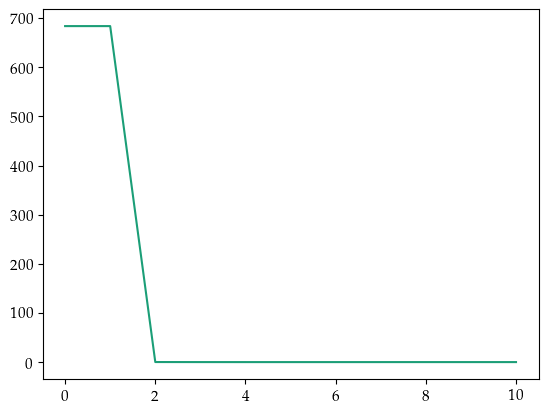

In [6]:
plt.plot((zax**2).sum(axis=1))

In [7]:
def draw_line(plot_to, xaxis, *vals, **pars):
    for val in vals:
        plot_to.plot([xaxis[0]-10, xaxis[-1]+10], [val, val], **pars)

C:\Users\micha\AppData\Local\Temp\ipykernel_28556\108035436.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  clm = cm.get_cmap('viridis', len(files))


Text(0.5, 0, 'adiabatic coupling ($\\alpha_1$) [cm$^{-1}$]')

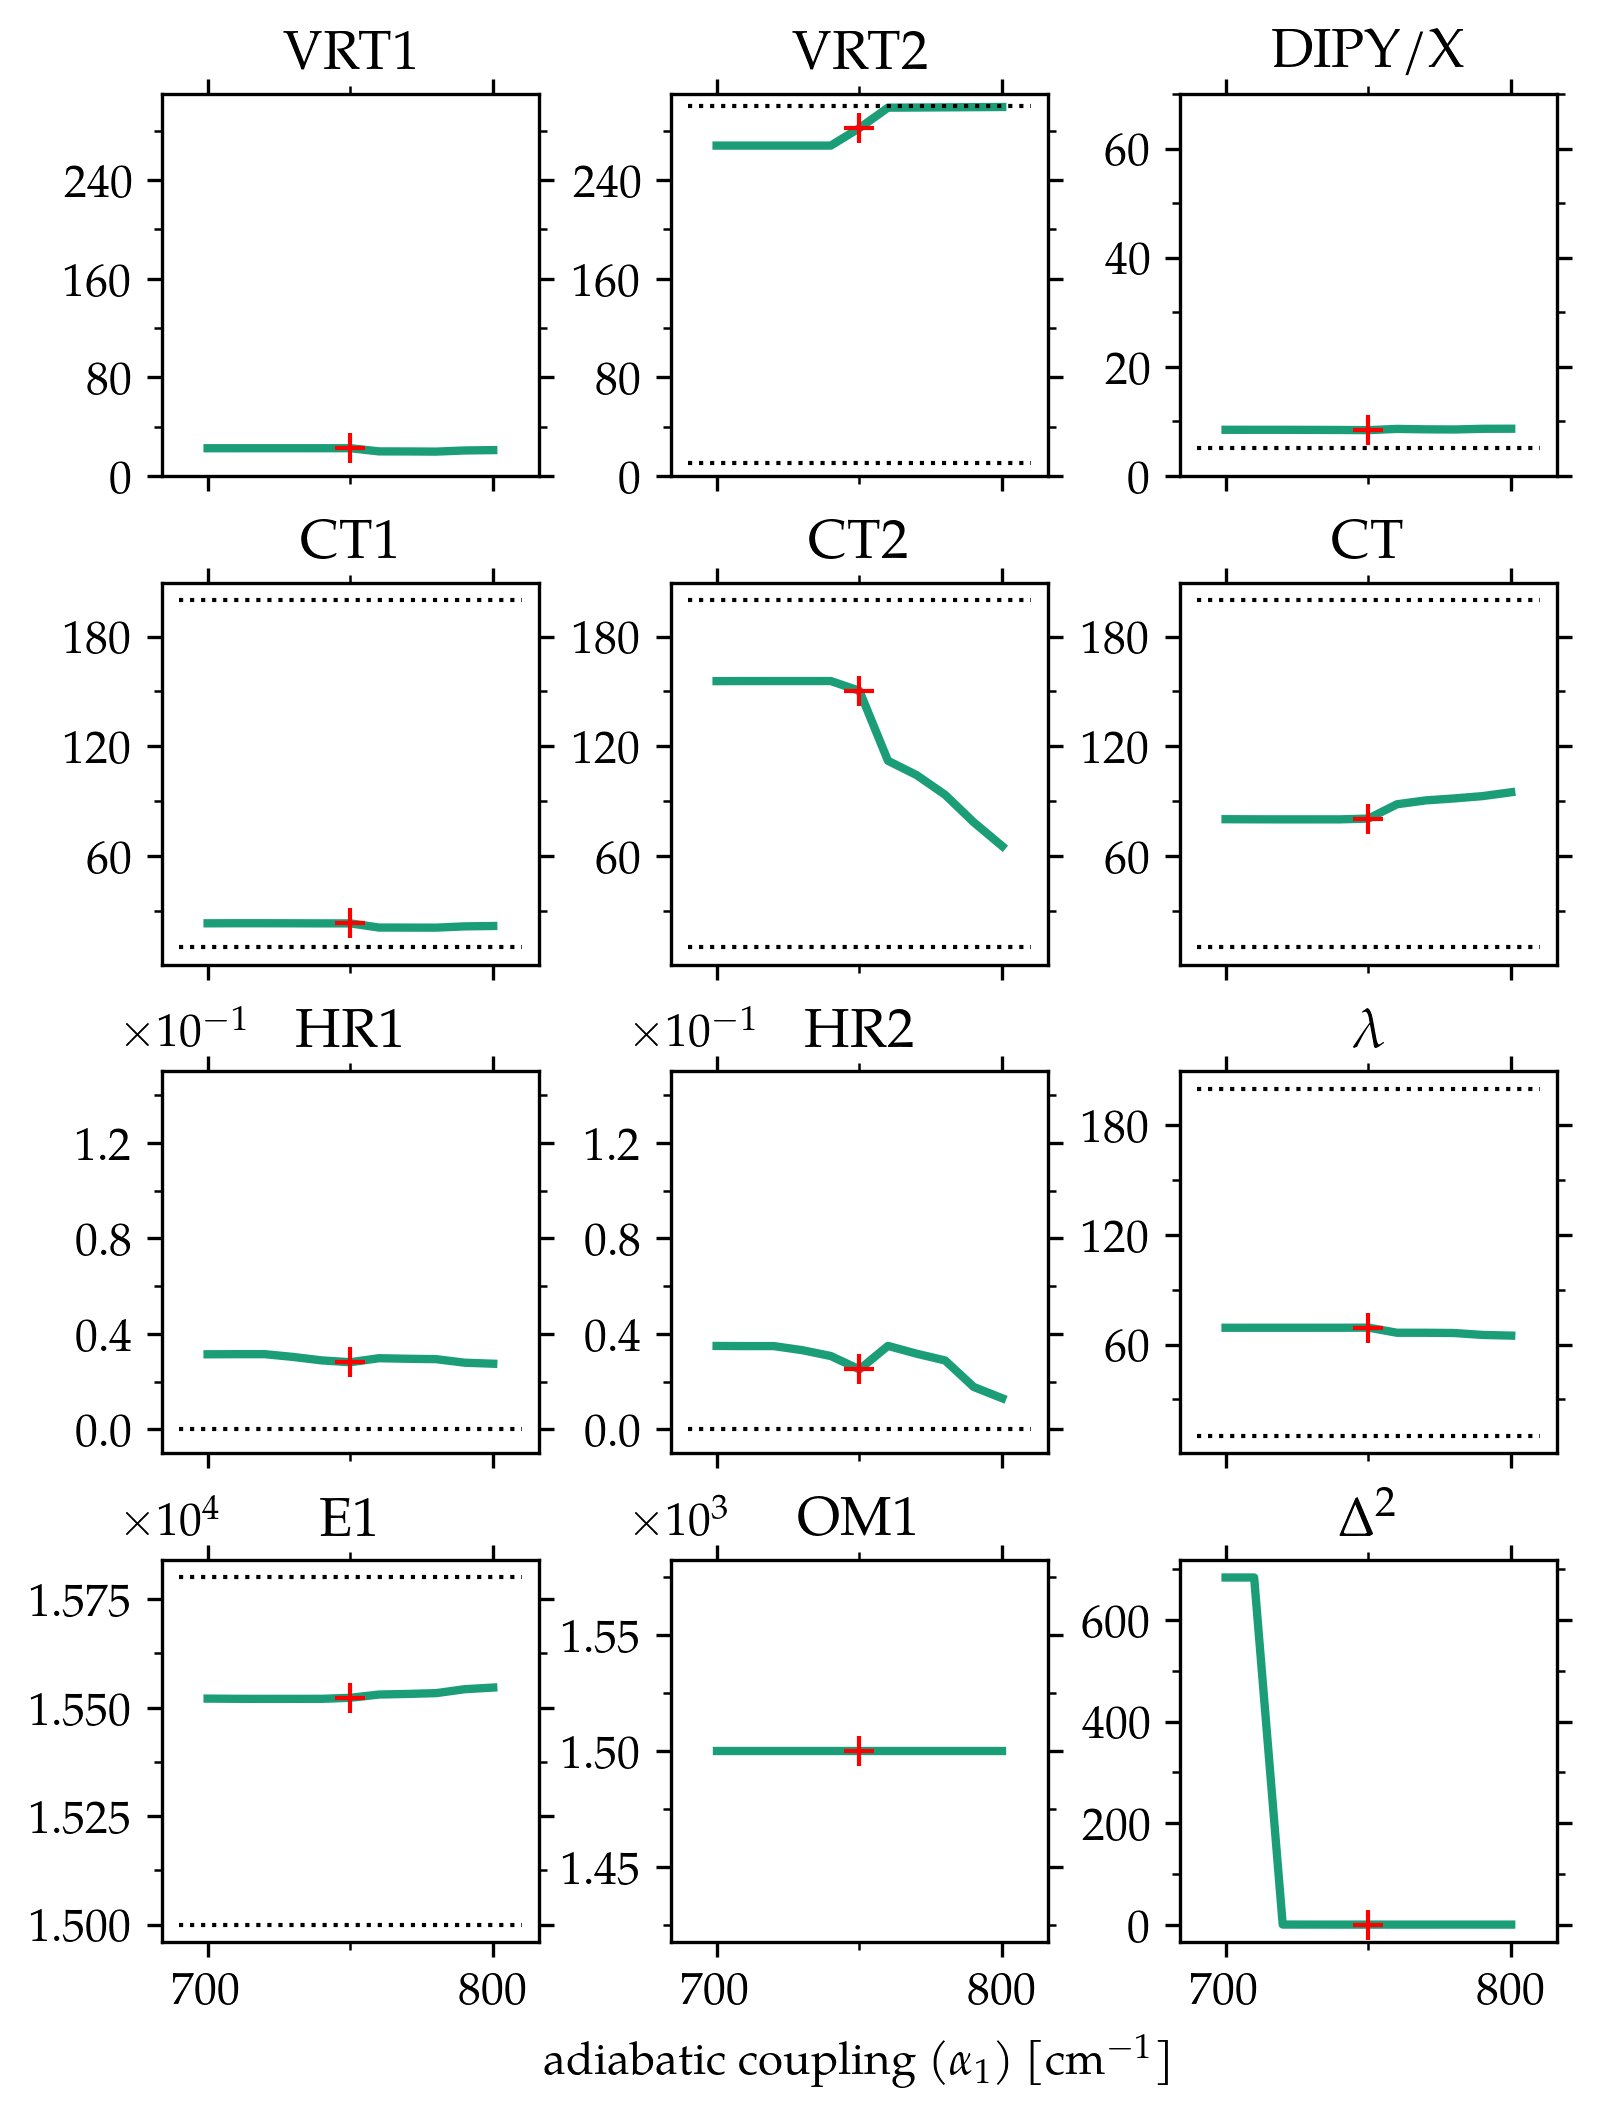

In [8]:
from matplotlib import cm
from spectre.matplotlib_latex import plt_latex, format_ticks

plt_latex()
clm = cm.get_cmap('viridis', len(files))

fig, grid = plt.subplots(4, 3, figsize=(6,8), dpi=300, sharex=True, facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace=0.28, wspace=0.35)

labels = list()

tt11 = list()
tt12 = list()
dipyx = list()
ct11 = list()
ct12 = list()
ct = list()
lamb = list()
hr11 = list()
hr12 = list()
e1 = list()
de = list()
om1 = list()
alpha = list()

for i, f in enumerate(sfiles[:]):
    filepath = os.path.join(path, f)
    optpars = spectre.utils.loadjson(filepath)
    datapath = filepath.replace('.json', '.npy')
    
    if os.path.isfile(datapath):
        data = np.load(datapath)
    else:
        syst, ta = spectre.full.init_system(optpars)
        spec = abss.calculate_abs_spectrum(syst, ta, optpars)
        spec.normalize()
        
        with qr.energy_units('1/cm'):
            data = np.vstack([spec.axis.data, spec.data])
            np.save(datapath, data)

    lab = f.split('.')[0].split('_')[2]
    labels.append(float(lab))

    tt11.append(optpars['scaled_OB_CF_vib_11']['target_time'])
    tt12.append(optpars['scaled_OB_CF_vib_12']['target_time'])
    dipyx.append(4.5**2 / optpars['dipx'][0]**2)
    ct11.append(optpars['scaled_OB_CF_vib_11']['cortime'])
    ct12.append(optpars['scaled_OB_CF_vib_12']['cortime'])
    ct.append(optpars['spectral_density_el']['cortime'])
    lamb.append(optpars['spectral_density_el']['reorg'])
    hr11.append(optpars['hr1'][0])
    hr12.append(optpars['hr1'][1])
    e1.append(optpars['energies'][1])
    de.append(optpars['energies'][2] - optpars['energies'][1])
    om1.append(optpars['omega'][0])
    alpha.append(optpars['dia_alpha1'])

#labels = labels[13:]
ii = [i for i,x in enumerate(labels) if x == 750][0]

### Line & marker parameters
pars = dict(linewidth=2, )
mpars = dict(marker='+', c='r', markersize=7)
lpars = dict(linewidth=1, linestyle='dotted', c='k')


## TT11
grid[0,0].plot(labels, tt11, **pars)
grid[0,0].plot(labels[ii], tt11[ii], **mpars)
grid[0,0].set_title('VRT1')

## TT12
grid[0,1].plot(labels, tt12, **pars)
grid[0,1].plot(labels[ii], tt12[ii], **mpars)
grid[0,1].set_title('VRT2')
draw_line(grid[0,1], labels, 10, 300, **lpars)
          
## DIP Y/X
grid[0,2].plot(labels, dipyx, **pars)
grid[0,2].plot(labels[ii], dipyx[ii], **mpars)
grid[0,2].set_title('DIPY/X')
draw_line(grid[0,2], labels, 4.5**2 / 0.2**2, 4.5**2 / 2**2, **lpars)

## CT11
grid[1,0].plot(labels, ct11, **pars)
grid[1,0].plot(labels[ii], ct11[ii], **mpars)
grid[1,0].set_title('CT1')
draw_line(grid[1,0], labels, 10, 200, **lpars)

## CT12
grid[1,1].plot(labels, ct12, **pars)
grid[1,1].plot(labels[ii], ct12[ii], **mpars)
grid[1,1].set_title('CT2')
draw_line(grid[1,1], labels, 10, 200, **lpars)

## CT
grid[1,2].plot(labels, ct, **pars)
grid[1,2].plot(labels[ii], ct[ii], **mpars)
grid[1,2].set_title('CT')
draw_line(grid[1,2], labels, 10, 200, **lpars)

## HR11
grid[2,0].plot(labels, hr11, **pars)
grid[2,0].plot(labels[ii], hr11[ii], **mpars)
grid[2,0].set_title('HR1')
draw_line(grid[2,0], labels, 0.00001, 0.4, **lpars)

## HR12
grid[2,1].plot(labels, hr12, **pars)
grid[2,1].plot(labels[ii], hr12[ii], **mpars)
grid[2,1].set_title('HR2')
draw_line(grid[2,1], labels, 0.00001, 0.4, **lpars)

## lambda
grid[2,2].plot(labels, lamb, **pars)
grid[2,2].plot(labels[ii], lamb[ii], **mpars)
grid[2,2].set_title(r'$\lambda$')
draw_line(grid[2,2], labels, 10, 200, **lpars)

## e1
grid[3,0].plot(labels, e1, **pars)
grid[3,0].plot(labels[ii], e1[ii], **mpars)
grid[3,0].set_title('E1')
draw_line(grid[3,0], labels, 15000, 15800, **lpars)

## omega
grid[3,1].plot(labels, om1, **pars)
grid[3,1].plot(labels[ii], om1[ii], **mpars)
grid[3,1].set_title('OM1')
#draw_line(grid[3,1], labels, 0.00001, 0.4, **lpars)

# ## alpha
# grid[3,2].plot(labels, alpha, **pars)
# grid[3,2].plot(labels[ii], alpha[ii], **mpars)
# grid[3,2].set_title(r'$\alpha$')
# #draw_line(grid[3,2], labels, 0.00001, 0.4, **lpars)

## alpha
delta = (zax**2).sum(axis=1)
grid[3,2].plot(labels, delta, **pars)
grid[3,2].plot(labels[ii], delta[ii], **mpars)
grid[3,2].set_title(r'$\Delta^2$')
#draw_line(grid[3,2], labels, 0.00001, 0.4, **lpars)
    


grid[0,0].set_ylim(0,310)
grid[0,1].sharey(grid[0,0])
# grid[0,1].set_ylim(0,250)

#grid[1,0].set_ylim(0,100)
grid[1,1].sharey(grid[1,0])
grid[1,2].sharey(grid[1,0])
# grid[1,1].set_ylim(0,100)
# grid[1,2].set_ylim(0,100)

grid[2,0].set_ylim(-0.01, 0.15)
grid[2,1].sharey(grid[2,0])
# grid[2,1].set_ylim(-0.01, 0.075)

#grid[0,0].set_xlim(10, 80)
grid[0,2].set_ylim(0,70)

#plt.xlim(14000, 20000)
#plt.ylim(-0.1, 1.1)
#plt.legend(frameon=False)

#sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(labels[0], labels[-1]))
#cbar = plt.colorbar(sm, orientation='horizontal')
#cbar.set_ticklabels(labs)

### TICKS
from matplotlib.ticker import MultipleLocator, AutoMinorLocator, MaxNLocator

for g in grid[:].flatten():
    pars = dict(labelbottom=False, labeltop=False, labelleft=True, labelright=False,
                bottom=True,           top=True,      left=True,      right=True,)
    #minor_pars = dict(bottom=True,           top=True,      left=True,      right=True)
    g.tick_params(which='both', **pars)
    #g.minor_tick_params(**minor_pars)
    
    g.xaxis.set_major_locator(MultipleLocator(100))
    g.xaxis.set_major_formatter('{x:.0f}')
    g.xaxis.set_minor_locator(MultipleLocator(50))
    g.yaxis.set_major_locator(MaxNLocator(nbins=4))
    g.yaxis.set_minor_locator(AutoMinorLocator(2))
    g.ticklabel_format(style='sci', axis='y', scilimits=(-1,3), useOffset=True)

    g.get_yaxis().set_offset_position("left")
    g.get_yaxis().OFFSETTEXTPAD = 7
    #g.get_yaxis().get_offset_text().set_position((-0.032,0))
    g.get_yaxis().get_offset_text().set_position((-0.097,0))

for g in grid[-1].flatten():
    pars = dict(labelbottom=True, labeltop=False, labelleft=True, labelright=False)
    g.tick_params(which='both', **pars)

# plt.locator_params(axis='x', nbins=4)
# plt.locator_params(axis='y', nbins=4)
#fig.tight_layout()

grid[3,1].set_xlabel(r'adiabatic coupling ($\alpha_1$) [cm$^{-1}$]')

# (3.) - Finer step - step 2

In [4]:
#path = "C:/Users/micha/Documents/Studium/MScThesis/data-meta/F-scanopt-ether02-1mode-free/results_F-ether02-1mode-free-s5-P-11010_scanopt_01_2023-07-08_14-00-56"
path = "C:/Users/micha/Documents/Studium/MScThesis/data-meta/F-scanopt-ether02-1mode-free/results_F-ether02-1mode-free-s2-P-11010_scanopt_01_2023-07-10_10-23-48"

In [5]:
files = [file for file in os.listdir(path) if file.endswith('.json') and file.startswith('opt')]
sfiles = sorted(files, key=lambda s: float(s.split('.')[0].split('_')[2]))

ref_id = 2

C:\Users\micha\AppData\Local\Temp\ipykernel_14204\4220794966.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  clm = cm.get_cmap('viridis', len(files))


Reorg: 2078.52033964
Reorg: 627.235364558
System init: 5.50s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    8.1s finished


Tensor calculation: 2.75s
Spectrum calculation (CPU): 8.36s
Reorg: 2075.08169058
Reorg: 627.303550431
System init: 6.07s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    8.0s finished


Tensor calculation: 2.68s
Spectrum calculation (CPU): 8.27s
Reorg: 2068.80334585
Reorg: 627.356966049
System init: 5.58s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    8.1s finished


Tensor calculation: 2.74s
Spectrum calculation (CPU): 8.30s
Reorg: 2065.39432836
Reorg: 627.380125509
System init: 6.11s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.6s finished


Tensor calculation: 2.54s
Spectrum calculation (CPU): 7.82s
Reorg: 2062.65454755
Reorg: 627.39771145
System init: 6.16s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.9s finished


Tensor calculation: 2.55s
Spectrum calculation (CPU): 8.12s
Reorg: 2057.63377368
Reorg: 627.458567853
System init: 5.75s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.8s finished


Tensor calculation: 2.96s
Spectrum calculation (CPU): 7.98s
Reorg: 2057.1567726
Reorg: 627.465570318
System init: 5.89s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.4s finished


Tensor calculation: 2.53s
Spectrum calculation (CPU): 7.66s
Reorg: 2061.66479614
Reorg: 628.245448216
System init: 5.65s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.7s finished


Tensor calculation: 2.50s
Spectrum calculation (CPU): 7.93s
Reorg: 2055.78072043
Reorg: 628.259155109
System init: 5.69s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.5s finished


Tensor calculation: 2.97s
Spectrum calculation (CPU): 7.67s
Reorg: 2051.70597834
Reorg: 628.289655423
System init: 5.99s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.9s finished


Tensor calculation: 2.47s
Spectrum calculation (CPU): 8.09s
Reorg: 2045.37518373
Reorg: 628.343593651
System init: 5.54s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.9s finished


Tensor calculation: 2.61s
Spectrum calculation (CPU): 8.09s
Reorg: 2042.93672496
Reorg: 628.355338339
System init: 5.35s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    8.1s finished


Tensor calculation: 2.72s
Spectrum calculation (CPU): 8.30s
Reorg: 2039.01523534
Reorg: 628.424343416
System init: 6.65s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    8.0s finished


Tensor calculation: 2.61s
Spectrum calculation (CPU): 8.25s
Reorg: 2033.46052728
Reorg: 628.450186904
System init: 5.53s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.4s finished


Tensor calculation: 2.75s
Spectrum calculation (CPU): 7.62s
Reorg: 2029.65042016
Reorg: 628.464751169
System init: 5.66s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    8.0s finished


Tensor calculation: 2.61s
Spectrum calculation (CPU): 8.24s
Reorg: 2028.16331417
Reorg: 628.475868378
System init: 6.01s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.5s finished


Tensor calculation: 2.45s
Spectrum calculation (CPU): 7.70s
Reorg: 2023.15793295
Reorg: 628.626943084
System init: 6.04s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.6s finished


Tensor calculation: 2.64s
Spectrum calculation (CPU): 7.78s
Reorg: 2019.55711218
Reorg: 628.642638361
System init: 5.70s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    8.0s finished


Tensor calculation: 2.70s
Spectrum calculation (CPU): 8.20s
Reorg: 2016.59093283
Reorg: 628.658041351
System init: 5.99s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.5s finished


Tensor calculation: 2.58s
Spectrum calculation (CPU): 7.69s
Reorg: 2015.38540245
Reorg: 628.662869695
System init: 5.96s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.8s finished


Tensor calculation: 2.50s
Spectrum calculation (CPU): 8.03s
Reorg: 2014.87807905
Reorg: 628.682685207
System init: 5.51s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    8.1s finished


Tensor calculation: 2.68s
Spectrum calculation (CPU): 8.30s
Reorg: 2011.46382788
Reorg: 628.75681501
System init: 5.70s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.7s finished


Tensor calculation: 2.43s
Spectrum calculation (CPU): 7.90s
Reorg: 2009.92439234
Reorg: 628.765761596
System init: 5.94s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.7s finished


Tensor calculation: 2.57s
Spectrum calculation (CPU): 7.89s
Reorg: 2007.68488238
Reorg: 628.853275382
System init: 5.56s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.9s finished


Tensor calculation: 2.54s
Spectrum calculation (CPU): 8.16s
Reorg: 2005.67276966
Reorg: 628.862292933
System init: 5.59s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.8s finished


Tensor calculation: 2.60s
Spectrum calculation (CPU): 7.99s
Reorg: 2002.30983791
Reorg: 628.882698857
System init: 5.92s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.4s finished


Tensor calculation: 2.60s
Spectrum calculation (CPU): 7.61s
Reorg: 1998.88086593
Reorg: 628.894130112
System init: 5.61s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    8.0s finished


Tensor calculation: 2.63s
Spectrum calculation (CPU): 8.19s
Reorg: 1996.23829647
Reorg: 628.905025438
System init: 5.49s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.6s finished


Tensor calculation: 2.76s
Spectrum calculation (CPU): 7.82s
Reorg: 1993.50133334
Reorg: 628.916327175
System init: 6.07s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.7s finished


Tensor calculation: 2.69s
Spectrum calculation (CPU): 7.88s
Reorg: 1992.01161833
Reorg: 628.921619196
System init: 5.51s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    8.1s finished


Tensor calculation: 2.49s
Spectrum calculation (CPU): 8.29s
Reorg: 1988.27206271
Reorg: 628.926761788
System init: 5.69s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.7s finished


Tensor calculation: 2.86s
Spectrum calculation (CPU): 7.90s
Reorg: 1986.049318
Reorg: 628.937266545
System init: 5.85s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.6s finished


Tensor calculation: 2.61s
Spectrum calculation (CPU): 7.81s
Reorg: 1984.07630421
Reorg: 628.947931606
System init: 5.77s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.9s finished


Tensor calculation: 2.51s
Spectrum calculation (CPU): 8.09s
Reorg: 1983.50602668
Reorg: 628.95270161
System init: 5.58s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.4s finished


Tensor calculation: 2.79s
Spectrum calculation (CPU): 7.63s
Reorg: 2059.96676289
Reorg: 822.753841974
System init: 5.78s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.8s finished


Tensor calculation: 2.69s
Spectrum calculation (CPU): 8.00s
Reorg: 2293.68716695
Reorg: 823.148926922
System init: 5.87s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.8s finished


Tensor calculation: 2.71s
Spectrum calculation (CPU): 7.98s
Reorg: 2292.95498914
Reorg: 824.410235564
System init: 5.81s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.6s finished


Tensor calculation: 2.95s
Spectrum calculation (CPU): 7.77s
Reorg: 2233.77268507
Reorg: 827.476544517
System init: 5.94s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.8s finished


Tensor calculation: 2.70s
Spectrum calculation (CPU): 7.97s
Reorg: 1997.11482553
Reorg: 832.161160265
System init: 5.82s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    8.3s finished


Tensor calculation: 2.76s
Spectrum calculation (CPU): 8.53s
Reorg: 1988.87040574
Reorg: 833.028850714
System init: 5.56s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.1s finished


Tensor calculation: 2.80s
Spectrum calculation (CPU): 7.33s
Reorg: 1988.6465989
Reorg: 833.419549348
System init: 6.09s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.9s finished


Tensor calculation: 2.68s
Spectrum calculation (CPU): 8.12s
Reorg: 1979.4780365
Reorg: 836.435171631
System init: 5.81s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    8.1s finished


Tensor calculation: 2.60s
Spectrum calculation (CPU): 8.30s
Reorg: 1979.40416412
Reorg: 836.433459856
System init: 5.94s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.5s finished


Tensor calculation: 2.57s
Spectrum calculation (CPU): 7.75s
Reorg: 1976.92667009
Reorg: 836.445692357
System init: 5.84s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.5s finished


Tensor calculation: 2.75s
Spectrum calculation (CPU): 7.72s
Reorg: 1975.4025217
Reorg: 836.448470662
System init: 5.60s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.8s finished


Tensor calculation: 2.61s
Spectrum calculation (CPU): 8.05s
Reorg: 1974.24309615
Reorg: 836.450728961
System init: 5.74s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.7s finished


Tensor calculation: 2.81s
Spectrum calculation (CPU): 7.89s
Reorg: 1973.29410089
Reorg: 836.452897728
System init: 5.58s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.6s finished


Tensor calculation: 2.71s
Spectrum calculation (CPU): 7.81s
Reorg: 1972.7294377
Reorg: 836.454461864
System init: 5.44s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.9s finished


Tensor calculation: 2.77s
Spectrum calculation (CPU): 8.10s
Reorg: 1972.27459121
Reorg: 836.457777765
System init: 5.79s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.5s finished


Tensor calculation: 2.79s
Spectrum calculation (CPU): 7.72s
Reorg: 1919.71566741
Reorg: 874.153347163
System init: 5.88s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.3s finished


Tensor calculation: 2.53s
Spectrum calculation (CPU): 7.54s
Reorg: 1889.48137182
Reorg: 874.386952709
System init: 5.27s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.4s finished


Tensor calculation: 2.38s
Spectrum calculation (CPU): 7.57s
Reorg: 1874.27363242
Reorg: 874.518284552
System init: 4.94s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.5s finished


Tensor calculation: 2.24s
Spectrum calculation (CPU): 7.71s
Reorg: 1869.74803322
Reorg: 874.533069241
System init: 5.01s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.4s finished


Tensor calculation: 2.22s
Spectrum calculation (CPU): 7.57s
Reorg: 1865.46301049
Reorg: 874.55032817
System init: 5.01s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.5s finished


Tensor calculation: 2.25s
Spectrum calculation (CPU): 7.73s
Reorg: 1862.71523174
Reorg: 874.567065196
System init: 4.99s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.3s finished


Tensor calculation: 2.25s
Spectrum calculation (CPU): 7.55s
Reorg: 1859.85376896
Reorg: 874.580634734
System init: 4.97s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.1s finished


Tensor calculation: 2.26s
Spectrum calculation (CPU): 7.33s
Reorg: 1856.95548215
Reorg: 874.595016529
System init: 4.94s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.3s finished


Tensor calculation: 2.26s
Spectrum calculation (CPU): 7.72s
Reorg: 1852.37826271
Reorg: 874.61303294
System init: 4.99s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.3s finished


Tensor calculation: 2.28s
Spectrum calculation (CPU): 7.52s
Reorg: 1849.94671831
Reorg: 874.623209587
System init: 4.90s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    6.2s finished


Tensor calculation: 2.26s
Spectrum calculation (CPU): 6.41s
Reorg: 1846.96151371
Reorg: 874.62993764
System init: 4.85s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    6.1s finished


Tensor calculation: 2.23s
Spectrum calculation (CPU): 6.32s
Reorg: 1844.85408997
Reorg: 874.639049732
System init: 4.89s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.3s finished


Tensor calculation: 2.23s
Spectrum calculation (CPU): 7.57s
Reorg: 1843.46724665
Reorg: 874.645185443
System init: 4.88s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.6s finished


Tensor calculation: 2.27s
Spectrum calculation (CPU): 7.81s
Reorg: 1841.83536774
Reorg: 874.652876003
System init: 4.92s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.2s finished


Tensor calculation: 2.26s
Spectrum calculation (CPU): 7.40s
Reorg: 1836.42662117
Reorg: 874.658356774
System init: 4.89s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.6s finished


Tensor calculation: 2.28s
Spectrum calculation (CPU): 7.77s
Reorg: 872.221117799
Reorg: 753.168362991
System init: 4.88s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.7s finished


Tensor calculation: 2.27s
Spectrum calculation (CPU): 7.92s
Reorg: 870.335321033
Reorg: 747.95359924
System init: 4.99s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.0s finished


Tensor calculation: 2.27s
Spectrum calculation (CPU): 7.23s
Reorg: 909.758496577
Reorg: 780.619796454
System init: 5.07s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.3s finished


Tensor calculation: 2.31s
Spectrum calculation (CPU): 7.51s
Reorg: 844.928861472
Reorg: 973.007310586
System init: 4.95s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.4s finished


Tensor calculation: 2.34s
Spectrum calculation (CPU): 7.62s
Reorg: 819.050120676
Reorg: 846.203631605
System init: 4.91s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.4s finished


Tensor calculation: 2.29s
Spectrum calculation (CPU): 7.63s
Reorg: 820.198655949
Reorg: 837.88381968
System init: 5.04s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.2s finished


Tensor calculation: 2.32s
Spectrum calculation (CPU): 7.43s
Reorg: 816.337252498
Reorg: 837.888252394
System init: 4.88s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.4s finished


Tensor calculation: 2.25s
Spectrum calculation (CPU): 7.59s
Reorg: 811.94323564
Reorg: 837.854987849
System init: 4.98s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.8s finished


Tensor calculation: 2.25s
Spectrum calculation (CPU): 8.03s
Reorg: 791.566929751
Reorg: 832.823350973
System init: 4.87s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.2s finished


Tensor calculation: 2.27s
Spectrum calculation (CPU): 7.39s
Reorg: 787.420280494
Reorg: 817.591001101
System init: 5.04s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.0s finished


Tensor calculation: 2.26s
Spectrum calculation (CPU): 7.25s
Reorg: 785.210811456
Reorg: 820.688748463
System init: 4.94s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    8.1s finished


Tensor calculation: 2.25s
Spectrum calculation (CPU): 8.30s
Reorg: 754.203799174
Reorg: 889.75537174
System init: 4.74s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    8.3s finished


Tensor calculation: 2.20s
Spectrum calculation (CPU): 8.55s
Reorg: 879.517903572
Reorg: 883.299863454
System init: 4.74s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.9s finished


Tensor calculation: 2.25s
Spectrum calculation (CPU): 8.13s
Reorg: 877.159481547
Reorg: 827.391209762
System init: 4.88s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.4s finished


Tensor calculation: 2.23s
Spectrum calculation (CPU): 7.59s
Reorg: 903.002820689
Reorg: 1005.56435163
System init: 4.85s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.2s finished


Tensor calculation: 2.30s
Spectrum calculation (CPU): 7.39s
Reorg: 795.153445329
Reorg: 1054.00551921
System init: 4.98s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.3s finished


Tensor calculation: 2.26s
Spectrum calculation (CPU): 7.53s
Reorg: 922.01292831
Reorg: 1062.53122369
System init: 4.87s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.3s finished


Tensor calculation: 2.24s
Spectrum calculation (CPU): 7.55s
Reorg: 923.354971658
Reorg: 1070.71290132
System init: 4.87s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.7s finished


Tensor calculation: 2.26s
Spectrum calculation (CPU): 7.94s
Reorg: 935.40162415
Reorg: 1070.1808873
System init: 4.91s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.5s finished


Tensor calculation: 2.31s
Spectrum calculation (CPU): 7.70s
Reorg: 936.219283937
Reorg: 1066.57043513
System init: 4.88s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.5s finished


Tensor calculation: 2.26s
Spectrum calculation (CPU): 7.74s
Reorg: 941.340156301
Reorg: 85.2097550917
System init: 4.91s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.4s finished


Tensor calculation: 2.23s
Spectrum calculation (CPU): 7.61s
Reorg: 935.984745563
Reorg: 83.124661602
System init: 4.90s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.4s finished


Tensor calculation: 2.23s
Spectrum calculation (CPU): 7.64s
Reorg: 1316.62579117
Reorg: 1305.9762283
System init: 4.87s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.5s finished


Tensor calculation: 2.26s
Spectrum calculation (CPU): 7.71s
Reorg: 1323.32980075
Reorg: 1305.60220526
System init: 4.89s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.4s finished


Tensor calculation: 2.26s
Spectrum calculation (CPU): 7.66s
Reorg: 980.527706704
Reorg: 1304.63413025
System init: 4.92s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.7s finished


Tensor calculation: 2.22s
Spectrum calculation (CPU): 7.89s
Reorg: 967.538270266
Reorg: 1302.93642172
System init: 4.91s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.6s finished


Tensor calculation: 2.24s
Spectrum calculation (CPU): 7.87s
Reorg: 967.310073147
Reorg: 1303.77061769
System init: 4.87s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.7s finished


Tensor calculation: 2.30s
Spectrum calculation (CPU): 7.94s
Reorg: 967.213300669
Reorg: 1304.70143564
System init: 4.85s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.5s finished


Tensor calculation: 2.21s
Spectrum calculation (CPU): 7.73s
Reorg: 966.703646933
Reorg: 1307.10409255
System init: 5.02s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.6s finished


Tensor calculation: 2.32s
Spectrum calculation (CPU): 7.78s
Reorg: 966.703511897
Reorg: 1307.10410677
System init: 4.92s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.5s finished


Tensor calculation: 2.26s
Spectrum calculation (CPU): 7.67s
Reorg: 966.703507074
Reorg: 1307.10410804
System init: 4.97s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.2s finished


Tensor calculation: 2.24s
Spectrum calculation (CPU): 7.44s
Reorg: 964.946903467
Reorg: 1308.10871879
System init: 4.91s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    6.8s finished


Tensor calculation: 2.26s
Spectrum calculation (CPU): 7.03s
Reorg: 962.40989383
Reorg: 1311.2650036
System init: 4.92s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.1s finished


Tensor calculation: 2.21s
Spectrum calculation (CPU): 7.35s
Reorg: 955.084319462
Reorg: 1319.86175952
System init: 4.92s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.1s finished


Tensor calculation: 2.23s
Spectrum calculation (CPU): 7.28s
Reorg: 1036.30425351
Reorg: 1345.10890483
System init: 4.96s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.2s finished


Tensor calculation: 2.22s
Spectrum calculation (CPU): 7.44s
Reorg: 1041.20218156
Reorg: 1418.26067209
System init: 4.94s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.3s finished


Tensor calculation: 2.24s
Spectrum calculation (CPU): 7.50s
Reorg: 1068.59859061
Reorg: 1425.53182241
System init: 4.89s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.3s finished


Tensor calculation: 2.32s
Spectrum calculation (CPU): 7.51s
Reorg: 1107.25667929
Reorg: 1418.24917915
System init: 4.91s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.6s finished


Tensor calculation: 2.28s
Spectrum calculation (CPU): 7.82s
Reorg: 1101.93679401
Reorg: 1413.95867209
System init: 4.97s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.1s finished


Tensor calculation: 2.22s
Spectrum calculation (CPU): 7.33s
Reorg: 1076.47497358
Reorg: 1414.28248056
System init: 4.94s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.3s finished


Tensor calculation: 2.21s
Spectrum calculation (CPU): 7.53s
Reorg: 1015.67201484
Reorg: 1394.82240105
System init: 4.92s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.4s finished


Tensor calculation: 2.25s
Spectrum calculation (CPU): 7.75s
Reorg: 1010.56357482
Reorg: 1384.12499882
System init: 4.94s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.3s finished


Tensor calculation: 2.21s
Spectrum calculation (CPU): 7.50s
Reorg: 1003.94987121
Reorg: 1384.2723401
System init: 4.89s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    6.6s finished


Tensor calculation: 2.27s
Spectrum calculation (CPU): 6.88s
Reorg: 998.05091278
Reorg: 1385.365603
System init: 4.93s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.3s finished


Tensor calculation: 2.26s
Spectrum calculation (CPU): 7.50s
Reorg: 992.213681319
Reorg: 1385.78624815
System init: 4.95s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.0s finished


Tensor calculation: 2.26s
Spectrum calculation (CPU): 7.22s
Reorg: 977.903261394
Reorg: 1387.48025135
System init: 4.87s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.1s finished


Tensor calculation: 2.22s
Spectrum calculation (CPU): 7.29s
Reorg: 972.161773493
Reorg: 1388.51038617
System init: 5.05s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.5s finished


Tensor calculation: 2.42s
Spectrum calculation (CPU): 7.73s
Reorg: 968.68150725
Reorg: 1391.60363652
System init: 5.27s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.0s finished


Tensor calculation: 2.37s
Spectrum calculation (CPU): 7.22s
Reorg: 966.01736534
Reorg: 1397.25559796
System init: 4.89s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.2s finished


Tensor calculation: 2.24s
Spectrum calculation (CPU): 7.44s
Reorg: 962.581419893
Reorg: 1399.71608272
System init: 5.00s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.0s finished


Tensor calculation: 2.23s
Spectrum calculation (CPU): 7.24s
Reorg: 960.421307117
Reorg: 1404.30765813
System init: 4.91s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    6.8s finished


Tensor calculation: 2.26s
Spectrum calculation (CPU): 6.98s
Reorg: 958.098205849
Reorg: 1408.52223499
System init: 4.87s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.2s finished


Tensor calculation: 2.24s
Spectrum calculation (CPU): 7.38s
Reorg: 955.919946198
Reorg: 1412.79969508
System init: 4.96s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.1s finished


Tensor calculation: 2.30s
Spectrum calculation (CPU): 7.33s
Reorg: 954.468182338
Reorg: 1417.04264835
System init: 4.93s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.2s finished


Tensor calculation: 2.25s
Spectrum calculation (CPU): 7.39s
Reorg: 951.997822655
Reorg: 1421.26181749
System init: 5.07s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    6.9s finished


Tensor calculation: 2.29s
Spectrum calculation (CPU): 7.15s
Reorg: 949.71598884
Reorg: 1425.29343816
System init: 4.97s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.1s finished


Tensor calculation: 2.25s
Spectrum calculation (CPU): 7.34s
Reorg: 949.587592788
Reorg: 1429.88131992
System init: 4.95s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.5s finished


Tensor calculation: 2.26s
Spectrum calculation (CPU): 7.67s
Reorg: 948.17955848
Reorg: 1433.45697167
System init: 4.90s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.4s finished


Tensor calculation: 2.26s
Spectrum calculation (CPU): 7.66s
Reorg: 945.161204299
Reorg: 1433.73646439
System init: 4.89s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.5s finished


Tensor calculation: 2.27s
Spectrum calculation (CPU): 7.76s
Reorg: 949.974543109
Reorg: 1436.81202986
System init: 4.92s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.3s finished


Tensor calculation: 2.29s
Spectrum calculation (CPU): 7.49s
Reorg: 946.868760314
Reorg: 1438.75761805
System init: 5.12s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.0s finished


Tensor calculation: 2.34s
Spectrum calculation (CPU): 7.23s
Reorg: 947.176689751
Reorg: 1440.217588
System init: 5.25s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.1s finished


Tensor calculation: 2.24s
Spectrum calculation (CPU): 7.30s
Reorg: 941.938087191
Reorg: 1393.88339908
System init: 4.94s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.3s finished


Tensor calculation: 2.24s
Spectrum calculation (CPU): 7.47s
Reorg: 941.682380129
Reorg: 1397.02144356
System init: 4.93s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.1s finished


Tensor calculation: 2.26s
Spectrum calculation (CPU): 7.30s
Reorg: 944.214483868
Reorg: 1395.84817466
System init: 5.04s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.0s finished


Tensor calculation: 2.37s
Spectrum calculation (CPU): 7.23s
Reorg: 927.676359445
Reorg: 1164.80691112
System init: 4.96s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.1s finished


Tensor calculation: 2.27s
Spectrum calculation (CPU): 7.33s
Reorg: 925.580575218
Reorg: 972.708593477
System init: 5.01s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.3s finished


Tensor calculation: 2.31s
Spectrum calculation (CPU): 7.50s
Reorg: 925.063825766
Reorg: 965.968066403
System init: 4.93s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.0s finished


Tensor calculation: 2.27s
Spectrum calculation (CPU): 7.18s
Reorg: 921.362800117
Reorg: 965.749216723
System init: 4.90s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.2s finished


Tensor calculation: 2.24s
Spectrum calculation (CPU): 7.44s
Reorg: 932.418753333
Reorg: 1221.46827261
System init: 4.88s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.0s finished


Tensor calculation: 2.30s
Spectrum calculation (CPU): 7.23s
Reorg: 929.10900788
Reorg: 1224.02484823
System init: 4.96s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.1s finished


Tensor calculation: 2.28s
Spectrum calculation (CPU): 7.26s
Reorg: 925.608623454
Reorg: 1224.10986486
System init: 4.88s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.3s finished


Tensor calculation: 2.21s
Spectrum calculation (CPU): 7.47s
Reorg: 923.668654065
Reorg: 1224.10921501
System init: 4.92s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.2s finished


Tensor calculation: 2.26s
Spectrum calculation (CPU): 7.37s
Reorg: 923.751996348
Reorg: 1224.11017401
System init: 4.88s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.2s finished


Tensor calculation: 2.21s
Spectrum calculation (CPU): 7.43s
Reorg: 923.048145017
Reorg: 1226.16772445
System init: 4.97s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.4s finished


Tensor calculation: 2.26s
Spectrum calculation (CPU): 7.56s
Reorg: 1069.23815511
Reorg: 702.225406328
System init: 4.94s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.1s finished


Tensor calculation: 2.25s
Spectrum calculation (CPU): 7.30s
Reorg: 1271.6895327
Reorg: 1919.14562171
System init: 4.93s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.3s finished


Tensor calculation: 2.22s
Spectrum calculation (CPU): 7.56s
Reorg: 429.564862484
Reorg: 476.643980611
System init: 4.93s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.2s finished


Tensor calculation: 2.24s
Spectrum calculation (CPU): 7.46s
Reorg: 429.629974499
Reorg: 476.652135612
System init: 4.98s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.3s finished


Tensor calculation: 2.34s
Spectrum calculation (CPU): 7.48s
Reorg: 429.634355218
Reorg: 476.654655984
System init: 4.86s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.1s finished


Tensor calculation: 2.24s
Spectrum calculation (CPU): 7.26s
Reorg: 429.644502501
Reorg: 476.661752641
System init: 4.96s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.2s finished


Tensor calculation: 2.28s
Spectrum calculation (CPU): 7.44s
Reorg: 429.650121519
Reorg: 476.670050077
System init: 4.86s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.3s finished


Tensor calculation: 2.30s
Spectrum calculation (CPU): 7.48s
Reorg: 429.646502146
Reorg: 476.691904358
System init: 5.01s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.4s finished


Tensor calculation: 2.22s
Spectrum calculation (CPU): 7.65s
Reorg: 432.663028819
Reorg: 476.898556519
System init: 4.96s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.1s finished


Tensor calculation: 2.26s
Spectrum calculation (CPU): 7.34s
Reorg: 432.668794095
Reorg: 476.903528746
System init: 4.92s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.1s finished


Tensor calculation: 2.24s
Spectrum calculation (CPU): 7.30s
Reorg: 432.672040165
Reorg: 476.908390106
System init: 4.92s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    6.8s finished


Tensor calculation: 2.22s
Spectrum calculation (CPU): 7.07s
Reorg: 432.682464628
Reorg: 476.917306908
System init: 5.02s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.3s finished


Tensor calculation: 2.26s
Spectrum calculation (CPU): 7.53s
Reorg: 432.524109559
Reorg: 477.514807813
System init: 4.98s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.3s finished


Tensor calculation: 2.22s
Spectrum calculation (CPU): 7.52s
Reorg: 432.862490334
Reorg: 477.779210323
System init: 5.11s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.2s finished


Tensor calculation: 2.31s
Spectrum calculation (CPU): 7.42s
Reorg: 432.865395466
Reorg: 477.784082419
System init: 4.91s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.3s finished


Tensor calculation: 2.24s
Spectrum calculation (CPU): 7.54s
Reorg: 433.226169691
Reorg: 477.84909264
System init: 4.91s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.2s finished


Tensor calculation: 2.26s
Spectrum calculation (CPU): 7.36s
Reorg: 438.469376157
Reorg: 480.010443606
System init: 4.89s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.1s finished


Tensor calculation: 2.26s
Spectrum calculation (CPU): 7.32s
Reorg: 464.221960051
Reorg: 477.719326251
System init: 4.93s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.1s finished


Tensor calculation: 2.26s
Spectrum calculation (CPU): 7.27s
Reorg: 483.362492151
Reorg: 476.925441461
System init: 4.95s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    6.9s finished


Tensor calculation: 2.24s
Spectrum calculation (CPU): 7.12s
Reorg: 485.975826877
Reorg: 477.303197843
System init: 5.02s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.3s finished


Tensor calculation: 2.24s
Spectrum calculation (CPU): 7.53s
Reorg: 486.052291234
Reorg: 477.319929795
System init: 4.91s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.3s finished


Tensor calculation: 2.24s
Spectrum calculation (CPU): 7.50s
Reorg: 486.059623869
Reorg: 477.32915265
System init: 4.96s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.1s finished


Tensor calculation: 2.24s
Spectrum calculation (CPU): 7.34s
Reorg: 513.808212108
Reorg: 476.535863937
System init: 4.92s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    6.8s finished


Tensor calculation: 2.24s
Spectrum calculation (CPU): 7.04s
Reorg: 513.808212108
Reorg: 476.535863937
System init: 4.89s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.1s finished


Tensor calculation: 2.21s
Spectrum calculation (CPU): 7.32s
Reorg: 513.81978311
Reorg: 476.576403088
System init: 4.88s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.1s finished


Tensor calculation: 2.24s
Spectrum calculation (CPU): 7.26s
Reorg: 513.842549835
Reorg: 476.58813302
System init: 4.89s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.4s finished


Tensor calculation: 2.27s
Spectrum calculation (CPU): 7.57s
Reorg: 513.850175329
Reorg: 476.672525037
System init: 4.92s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.1s finished


Tensor calculation: 2.23s
Spectrum calculation (CPU): 7.30s
Reorg: 548.794424144
Reorg: 473.427828219
System init: 4.93s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.1s finished


Tensor calculation: 2.26s
Spectrum calculation (CPU): 7.31s
Reorg: 576.125388765
Reorg: 483.05949604
System init: 4.90s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    6.9s finished


Tensor calculation: 2.24s
Spectrum calculation (CPU): 7.16s
Reorg: 584.737599843
Reorg: 485.483733757
System init: 5.03s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.2s finished


Tensor calculation: 2.27s
Spectrum calculation (CPU): 7.42s
Reorg: 584.810040738
Reorg: 485.515429794
System init: 4.94s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.3s finished


Tensor calculation: 2.24s
Spectrum calculation (CPU): 7.49s
Reorg: 586.652981672
Reorg: 485.882392455
System init: 4.94s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.1s finished


Tensor calculation: 2.24s
Spectrum calculation (CPU): 7.28s
Reorg: 587.041034263
Reorg: 485.948785423
System init: 4.96s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.1s finished


Tensor calculation: 2.23s
Spectrum calculation (CPU): 7.31s
Reorg: 587.891505821
Reorg: 486.019539668
System init: 5.04s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.3s finished


Tensor calculation: 2.26s
Spectrum calculation (CPU): 7.54s
Reorg: 589.566279764
Reorg: 485.989966823
System init: 4.99s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.3s finished


Tensor calculation: 2.28s
Spectrum calculation (CPU): 7.53s
Reorg: 591.170099566
Reorg: 485.802392996
System init: 4.97s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    6.9s finished


Tensor calculation: 2.29s
Spectrum calculation (CPU): 7.16s
Reorg: 591.573364238
Reorg: 485.87830036
System init: 5.00s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.1s finished


Tensor calculation: 2.26s
Spectrum calculation (CPU): 7.34s
Reorg: 591.905691903
Reorg: 485.955352745
System init: 4.92s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.0s finished


Tensor calculation: 2.23s
Spectrum calculation (CPU): 7.22s
Reorg: 592.015537808
Reorg: 485.978998626
System init: 4.96s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    6.9s finished


Tensor calculation: 2.24s
Spectrum calculation (CPU): 7.16s
Reorg: 591.949141345
Reorg: 486.086482811
System init: 4.90s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.2s finished


Tensor calculation: 2.24s
Spectrum calculation (CPU): 7.42s
Reorg: 592.376736988
Reorg: 486.277426609
System init: 4.89s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.3s finished


Tensor calculation: 2.25s
Spectrum calculation (CPU): 7.49s
Reorg: 592.624203016
Reorg: 486.396961896
System init: 4.91s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.3s finished


Tensor calculation: 2.26s
Spectrum calculation (CPU): 7.47s
Reorg: 592.362996011
Reorg: 486.459777401
System init: 4.90s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.1s finished


Tensor calculation: 2.26s
Spectrum calculation (CPU): 7.29s
Reorg: 592.737397795
Reorg: 486.793168225
System init: 4.96s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.0s finished


Tensor calculation: 2.23s
Spectrum calculation (CPU): 7.25s
Reorg: 603.504651749
Reorg: 487.734408334
System init: 4.99s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.1s finished


Tensor calculation: 2.23s
Spectrum calculation (CPU): 7.30s
Reorg: 623.297110786
Reorg: 491.251570183
System init: 4.96s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.0s finished


Tensor calculation: 2.23s
Spectrum calculation (CPU): 7.21s
Reorg: 628.652709904
Reorg: 491.829555902
System init: 4.94s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.4s finished


Tensor calculation: 2.23s
Spectrum calculation (CPU): 7.67s
Reorg: 633.933105305
Reorg: 492.675472231
System init: 4.88s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.2s finished


Tensor calculation: 2.27s
Spectrum calculation (CPU): 7.40s
Reorg: 636.876182522
Reorg: 493.099496284
System init: 4.90s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.1s finished


Tensor calculation: 2.24s
Spectrum calculation (CPU): 7.29s
Reorg: 640.87095283
Reorg: 493.322213074
System init: 4.95s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.2s finished


Tensor calculation: 2.23s
Spectrum calculation (CPU): 7.45s
Reorg: 641.441287106
Reorg: 493.399367701
System init: 5.04s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    6.9s finished


Tensor calculation: 2.24s
Spectrum calculation (CPU): 7.08s
Reorg: 647.703872243
Reorg: 491.869971131
System init: 4.96s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.1s finished


Tensor calculation: 2.23s
Spectrum calculation (CPU): 7.28s
Reorg: 648.057773369
Reorg: 491.897121446
System init: 4.95s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.4s finished


Tensor calculation: 2.27s
Spectrum calculation (CPU): 7.59s
Reorg: 648.016372573
Reorg: 491.894649286
System init: 4.96s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.1s finished


Tensor calculation: 2.28s
Spectrum calculation (CPU): 7.32s
Reorg: 942.521698378
Reorg: 444.031731074
System init: 4.96s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.2s finished


Tensor calculation: 2.29s
Spectrum calculation (CPU): 7.44s
Reorg: 942.521698378
Reorg: 444.031731074
System init: 5.03s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.2s finished


Tensor calculation: 2.26s
Spectrum calculation (CPU): 7.36s
Reorg: 947.975534278
Reorg: 443.631107875
System init: 4.98s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.3s finished


Tensor calculation: 2.28s
Spectrum calculation (CPU): 7.51s
Reorg: 1109.17656689
Reorg: 458.525325197
System init: 5.06s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.3s finished


Tensor calculation: 2.26s
Spectrum calculation (CPU): 7.54s
Reorg: 1118.6384475
Reorg: 459.061527288
System init: 5.03s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.8s finished


Tensor calculation: 2.29s
Spectrum calculation (CPU): 8.03s
Reorg: 1138.19327719
Reorg: 495.822832908
System init: 4.99s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.5s finished


Tensor calculation: 2.28s
Spectrum calculation (CPU): 7.73s
Reorg: 1161.10030005
Reorg: 496.955276604
System init: 5.03s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.5s finished


Tensor calculation: 2.28s
Spectrum calculation (CPU): 7.87s
Reorg: 1110.61505614
Reorg: 530.948134791
System init: 4.96s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.9s finished
C:\Users\micha\AppData\Local\Temp\ipykernel_14204\4220794966.py:32: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, orientation='horizontal')


Tensor calculation: 2.27s
Spectrum calculation (CPU): 8.09s


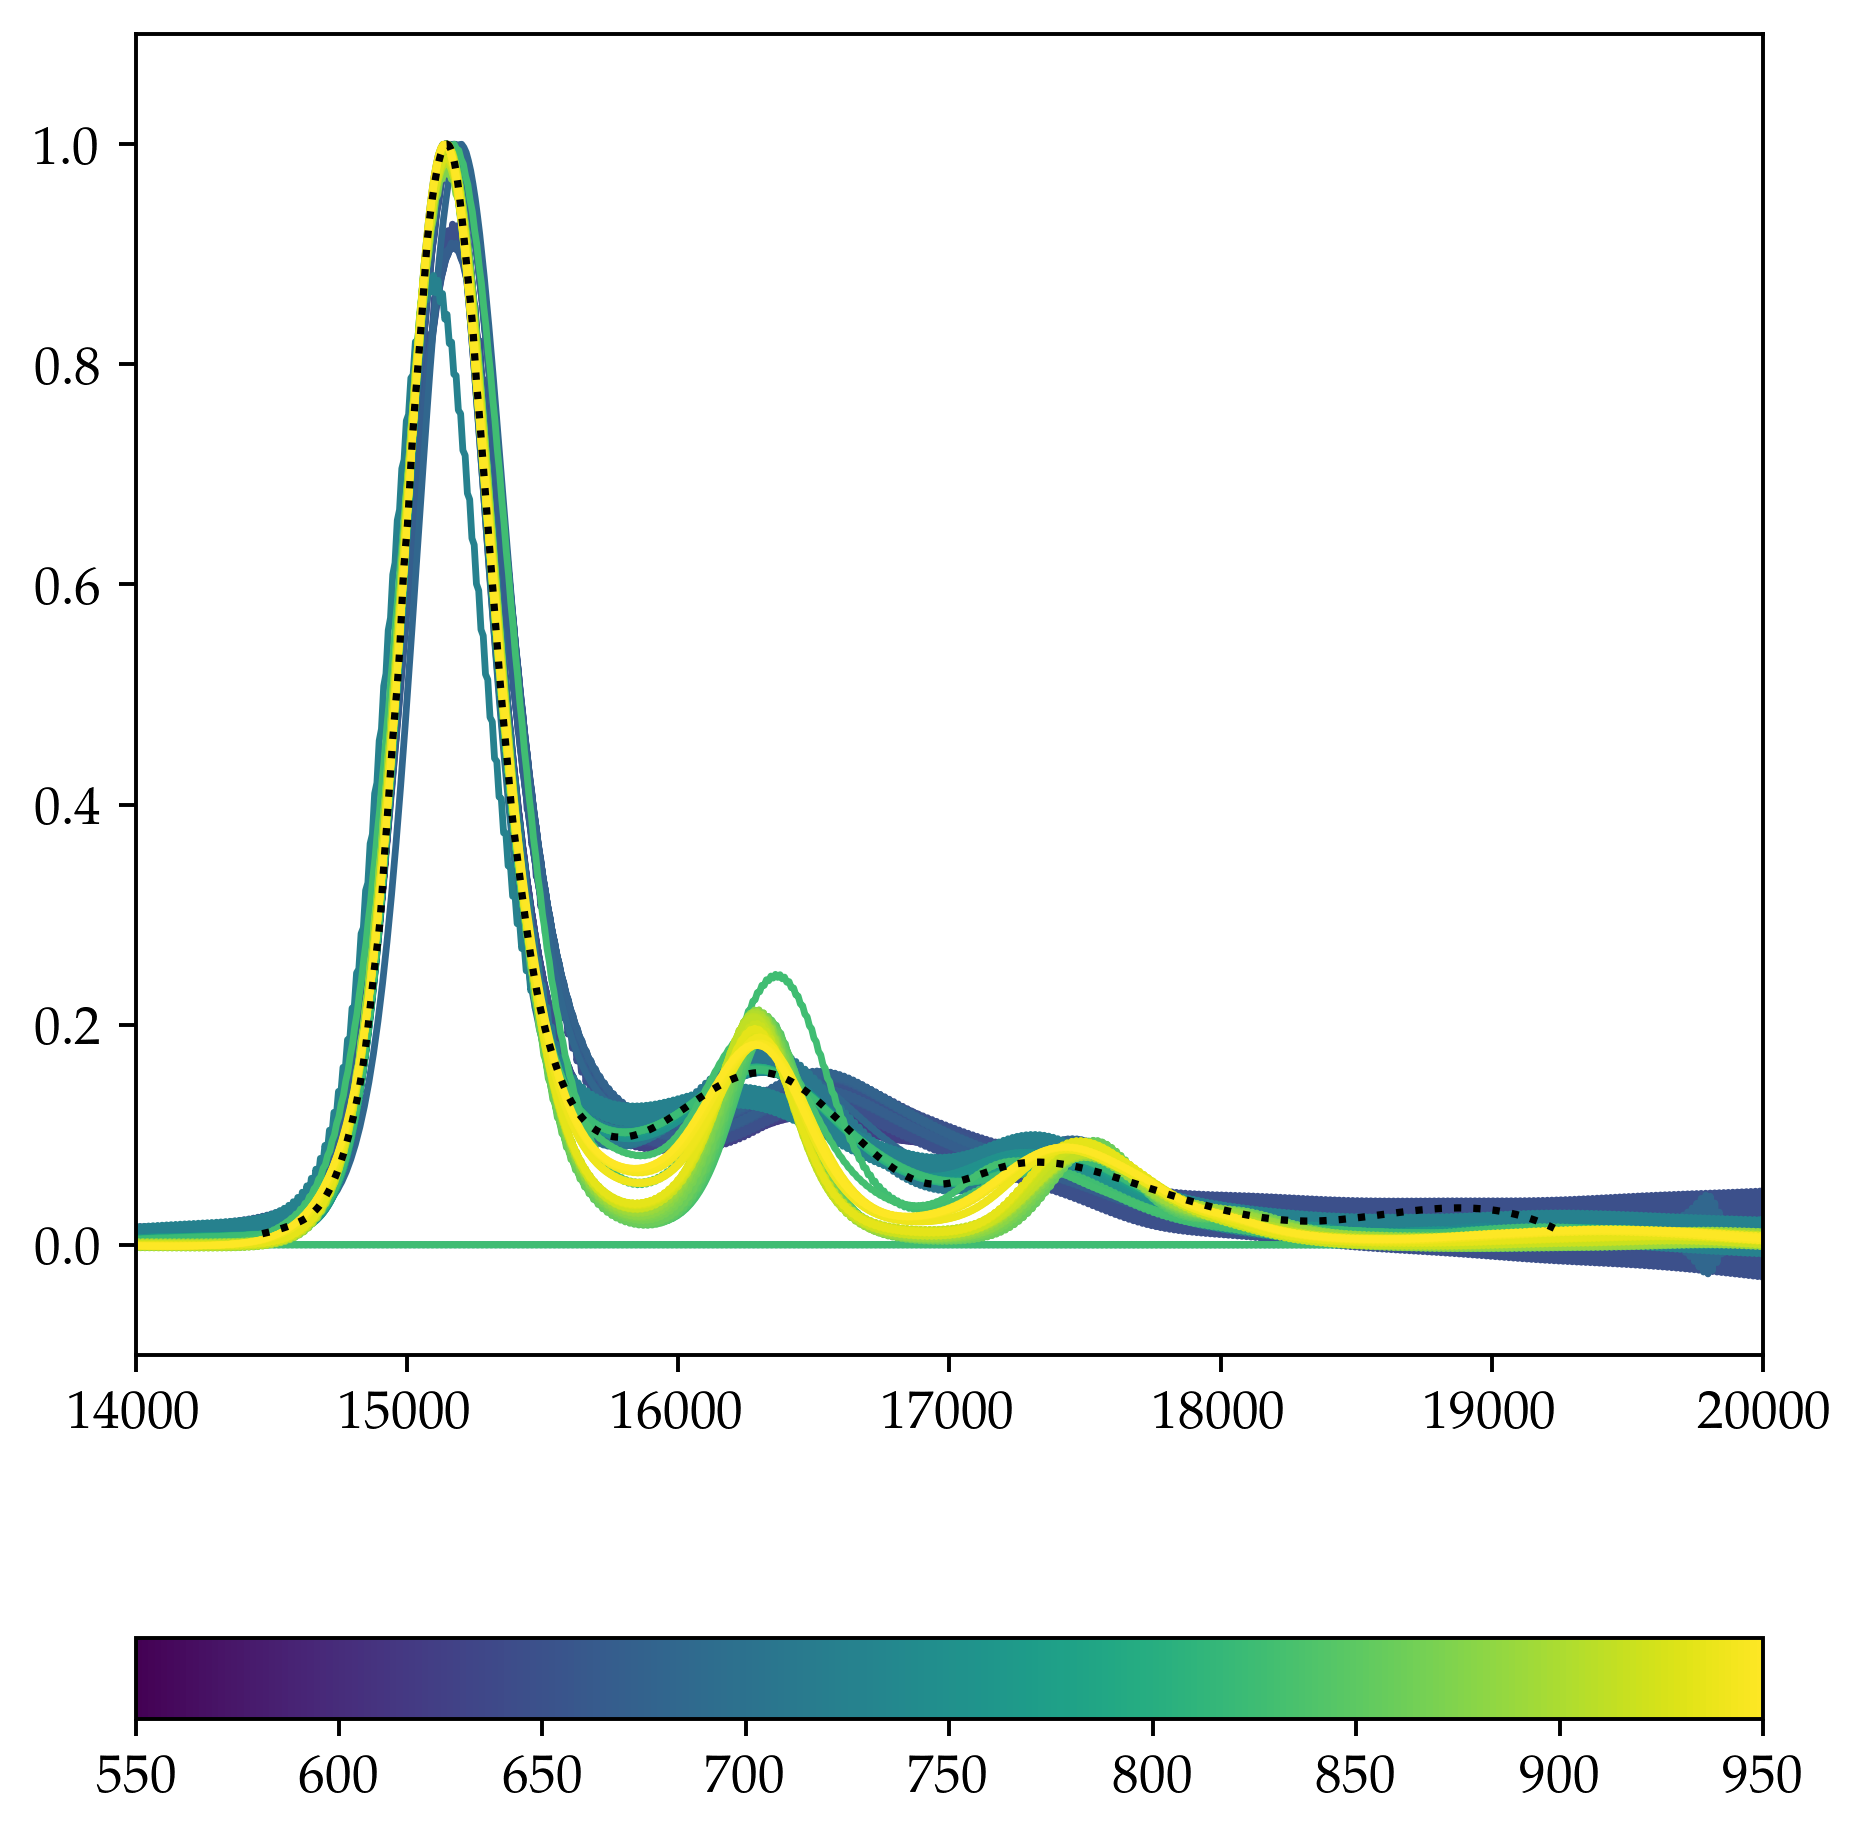

In [6]:
from matplotlib import cm
clm = cm.get_cmap('viridis', len(files))

fig, ax = plt.subplots(figsize=(6,7), dpi= 350)
labels = list()

for i, f in enumerate(sfiles[:]):
    filepath = os.path.join(path, f)
    optpars = spectre.utils.loadjson(filepath)
    datapath = filepath.replace('.json', '.npy')
    
    if os.path.isfile(datapath):
        data = np.load(datapath)
    else:
        syst, ta = spectre.full.init_system(optpars)
        spec = abss.calculate_abs_spectrum(syst, ta, optpars)
        spec.normalize()
        
        with qr.energy_units('1/cm'):
            data = np.vstack([spec.axis.data, spec.data])
            np.save(datapath, data)

    lab = f.split('.')[0].split('_')[2]
    plt.plot(data[0], data[1], label=lab, linewidth=1.4, color=clm(i))
    labels.append(lab)

plt.xlim(14000, 20000)
plt.ylim(-0.1, 1.1)
#plt.legend(frameon=False)

sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(labels[0], labels[-1]))
cbar = plt.colorbar(sm, orientation='horizontal')
#cbar.set_ticklabels(labs)

abss.plot_ref(ref_id, plot_to=ax, color='k', linestyle = 'dotted')

C:\Users\micha\AppData\Local\Temp\ipykernel_14204\1322340509.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  clm = cm.get_cmap('viridis', len(files))
C:\Users\micha\AppData\Local\Temp\ipykernel_14204\1322340509.py:17: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax0 = plt.subplot(gs[3])
 18%|███████████████▍                                                                    | 37/201 [01:06<04:26,  1.62s/it]C:\Users\micha\miniconda3\envs\py310-maya-1\lib\site-packages\scipy\interpolate\_fitpack2.py:298: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation 

1.00000001218


Text(0, 0.5, 'residuum')

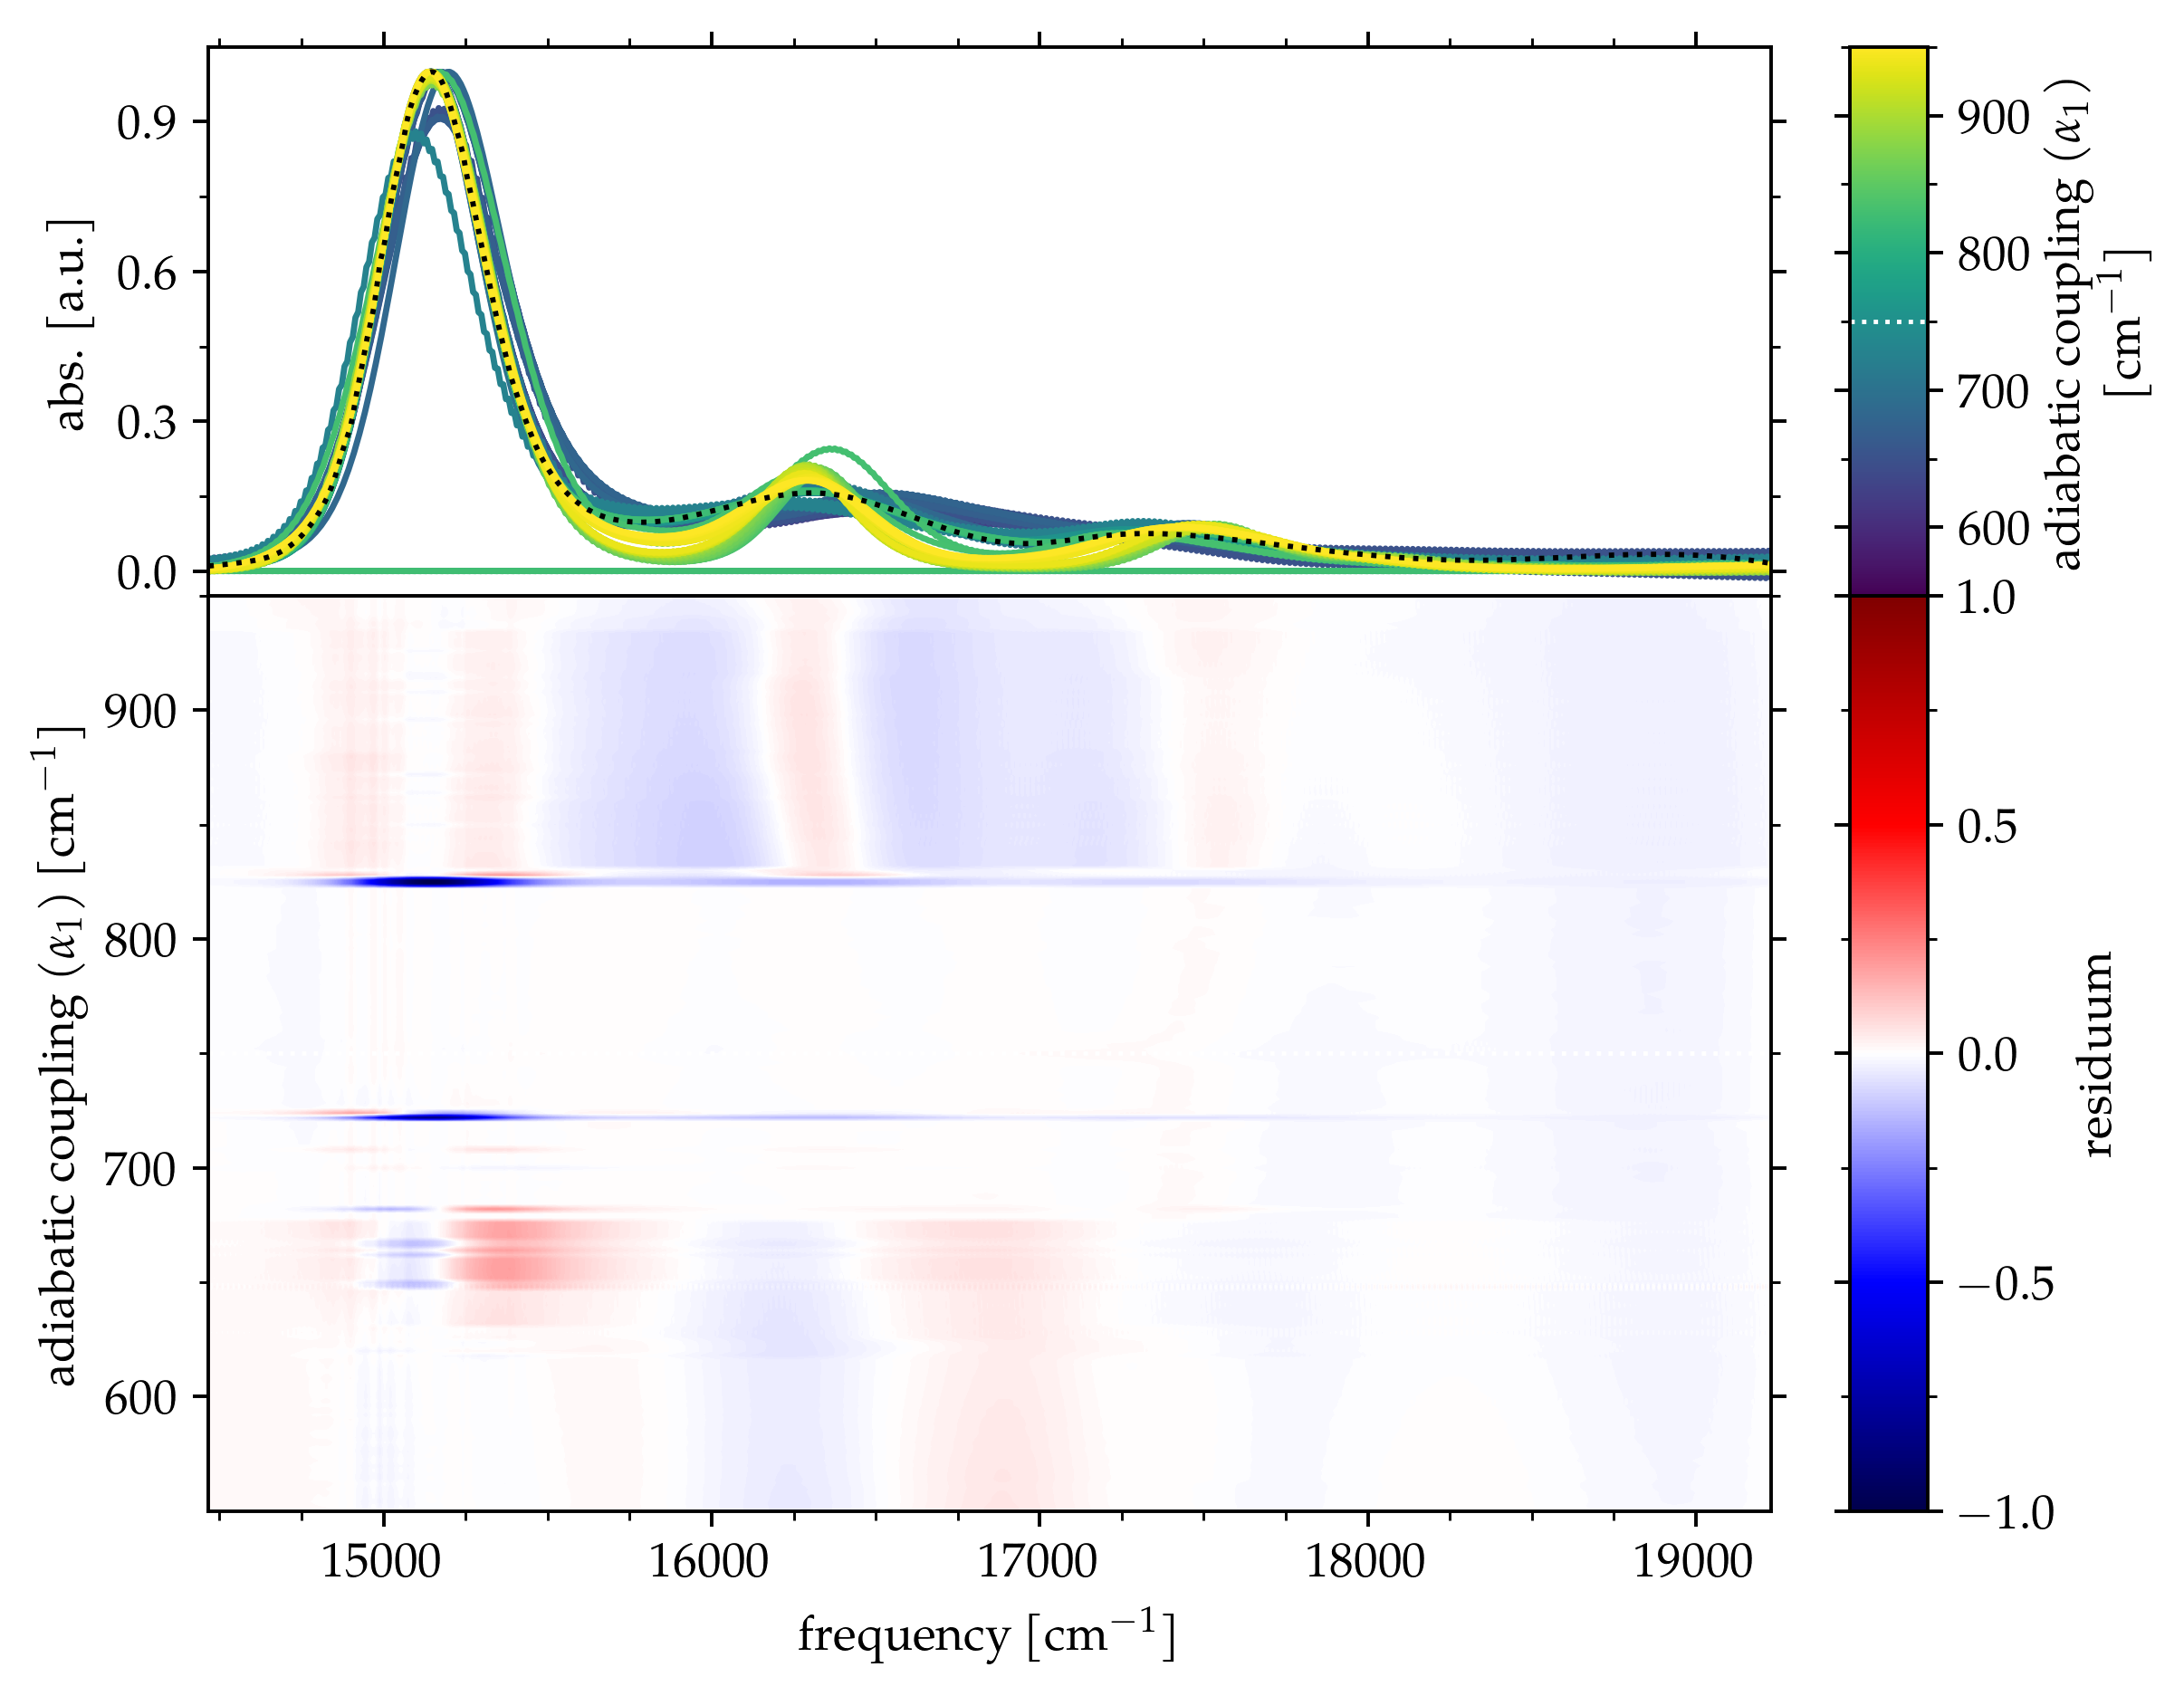

In [7]:
from matplotlib import cm
from scipy.interpolate import UnivariateSpline
from tqdm import tqdm
from matplotlib import gridspec

spline_s=0.0002
spline_k=3

clm = cm.get_cmap('viridis', len(files))

refdata = abss.plot_ref(ref_id, return_data='data', plot=False)
refx, refy = refdata

fig, ax = plt.subplots(num=None, figsize=(7,6), dpi=350, facecolor='w', edgecolor='k')
gs = gridspec.GridSpec(nrows=2, ncols=3, width_ratios=(1, 0.05, 0.05), height_ratios=(0.6, 1), figure=fig) 
#ax3 = plt.subplot(gs[3])
ax0 = plt.subplot(gs[3])
ax1 = plt.subplot(gs[0], sharex = ax0)
ax4 = plt.subplot(gs[5])
ax2 = plt.subplot(gs[2])
plt.subplots_adjust(hspace=0, wspace=0)

####################
#   ax1   #  # ax2 #
####################
#   ax0   #  # ax4 #
####################

all_data_filename = 'all_data.npy'
all_data_path = os.path.join(path, all_data_filename)

if os.path.isfile(all_data_path) and True:
    x, y, zdata = np.load(all_data_path)[:,3:-8]

    for i, (xx,z) in enumerate(zip(x,zdata)):
        ax1.plot(xx, z, linewidth=1.4, color=clm(i))
    
    zax = zdata - refy

else:
    labels = list()
    zax = None
    zdata = None
    i = 0

    for f in tqdm(sfiles[:]):
        i += 1
        filepath = os.path.join(path, f)
        optpars = spectre.utils.loadjson(filepath)
        datapath = filepath.replace('.json', '.npy')
        
        if os.path.isfile(datapath):
            data = np.load(datapath)
        else:
            syst, ta = spectre.full.init_system(optpars)
            spec = abss.calculate_abs_spectrum(syst, ta, optpars)
            spec.normalize()
            
            with qr.energy_units('1/cm'):
                data = np.vstack([spec.axis.data, spec.data])
                np.save(datapath, data)
    
        lab = f.split('.')[0].split('_')[2]
        spline = UnivariateSpline(*data, k=spline_k, s=spline_s)
        ydat = spline(refx) - refy
        
        if zax is None:
            zax = ydat
            zdata = spline(refx)
        else:
            zax = np.vstack([zax, ydat])
            zdata = np.vstack([zdata, spline(refx)])
        
        ax1.plot(data[0], data[1], label=lab, linewidth=1.4, color=clm(i))
        labels.append(float(lab))

    yax = np.array(labels)
    xax = refx
    x, y = np.meshgrid(xax, yax)
    np.save(all_data_path, np.array([x, y, zdata]))

maximum = np.abs(zax).max()
print(maximum)

cf = ax0.contourf(x, y, zax, 500, cmap="seismic", vmax=maximum, vmin=-maximum)

sm = plt.cm.ScalarMappable(cmap='seismic', norm=plt.Normalize(-maximum, maximum))
cbar = plt.colorbar(sm, cax=ax4, orientation='vertical')

sm2 = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(y[0,0], y[-1,0]))
cbar2 = plt.colorbar(sm2, cax=ax2, orientation='vertical')

ax0.plot([x[0,0], x[0,-1]], [750,750], linewidth=1, linestyle='dotted', c='w')
ax2.plot([0, 1], [750,750], linewidth=1, linestyle='dotted', c='w')

abss.plot_ref(ref_id, plot_to=ax1, linestyle='dotted', c='k', linewidth=1.2)

from matplotlib.ticker import MultipleLocator, AutoMinorLocator, MaxNLocator

for g in [ax0, ax1, ax2, ax4]:
    pars = dict(labelbottom=False, labeltop=False, labelleft=True, labelright=False,
                bottom=True,           top=True,      left=True,      right=True,)
    g.tick_params(which='both', **pars)
    
    #g.xaxis.set_major_locator(MultipleLocator(20))
    #g.xaxis.set_major_formatter('{x:.0f}')
    #g.xaxis.set_minor_locator(MultipleLocator(10))
    g.yaxis.set_major_locator(MaxNLocator(nbins=4))
    g.yaxis.set_minor_locator(AutoMinorLocator(2))
    g.xaxis.set_minor_locator(AutoMinorLocator(4))
    #g.ticklabel_format(style='sci', axis='y', scilimits=(-1,3), useOffset=True)

    #g.get_yaxis().set_offset_position("left")
    #g.get_yaxis().OFFSETTEXTPAD = 7
    #g.get_yaxis().get_offset_text().set_position((-0.097,0))

ax4.yaxis.set_major_locator(MaxNLocator(nbins=5))

ax0.tick_params(which='both', labelbottom=True, labelleft=True)
ax1.tick_params(which='both', bottom=False)
ax2.tick_params(which='both', labelleft=False, labelright=True)
ax4.tick_params(which='both', labelleft=False, labelright=True)

ax0.set_xlim(x[0,0], x[0,-1])
ax0.set_ylim(y[0,0], y[-1,0])
ax1.set_ylim(-0.05, 1.05)

ax0.set_xlabel(r'frequency [cm$^{-1}$]')
ax0.set_ylabel(r'adiabatic coupling ($\alpha_1$) [cm$^{-1}$]')
ax1.set_ylabel(r'abs. [a.u.]')
ax2.set_ylabel(r'\parbox{40mm}{\centering adiabatic coupling ($\alpha_1$) [cm$^{-1}$]}')
ax4.set_ylabel(r'residuum')

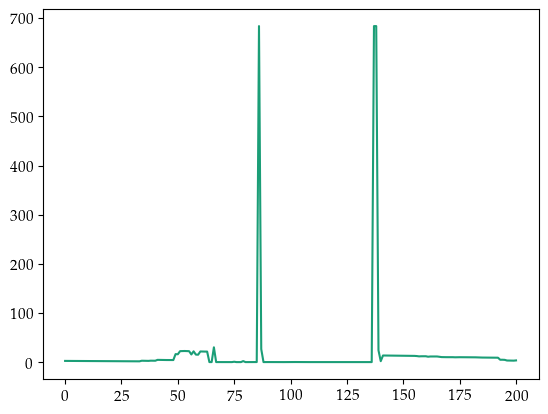

In [8]:
plt.plot((zax**2).sum(axis=1))

In [9]:
def draw_line(plot_to, xaxis, *vals, **pars):
    for val in vals:
        plot_to.plot([xaxis[0]-10, xaxis[-1]+10], [val, val], **pars)

C:\Users\micha\AppData\Local\Temp\ipykernel_14204\108035436.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  clm = cm.get_cmap('viridis', len(files))


Text(0.5, 0, 'adiabatic coupling ($\\alpha_1$) [cm$^{-1}$]')

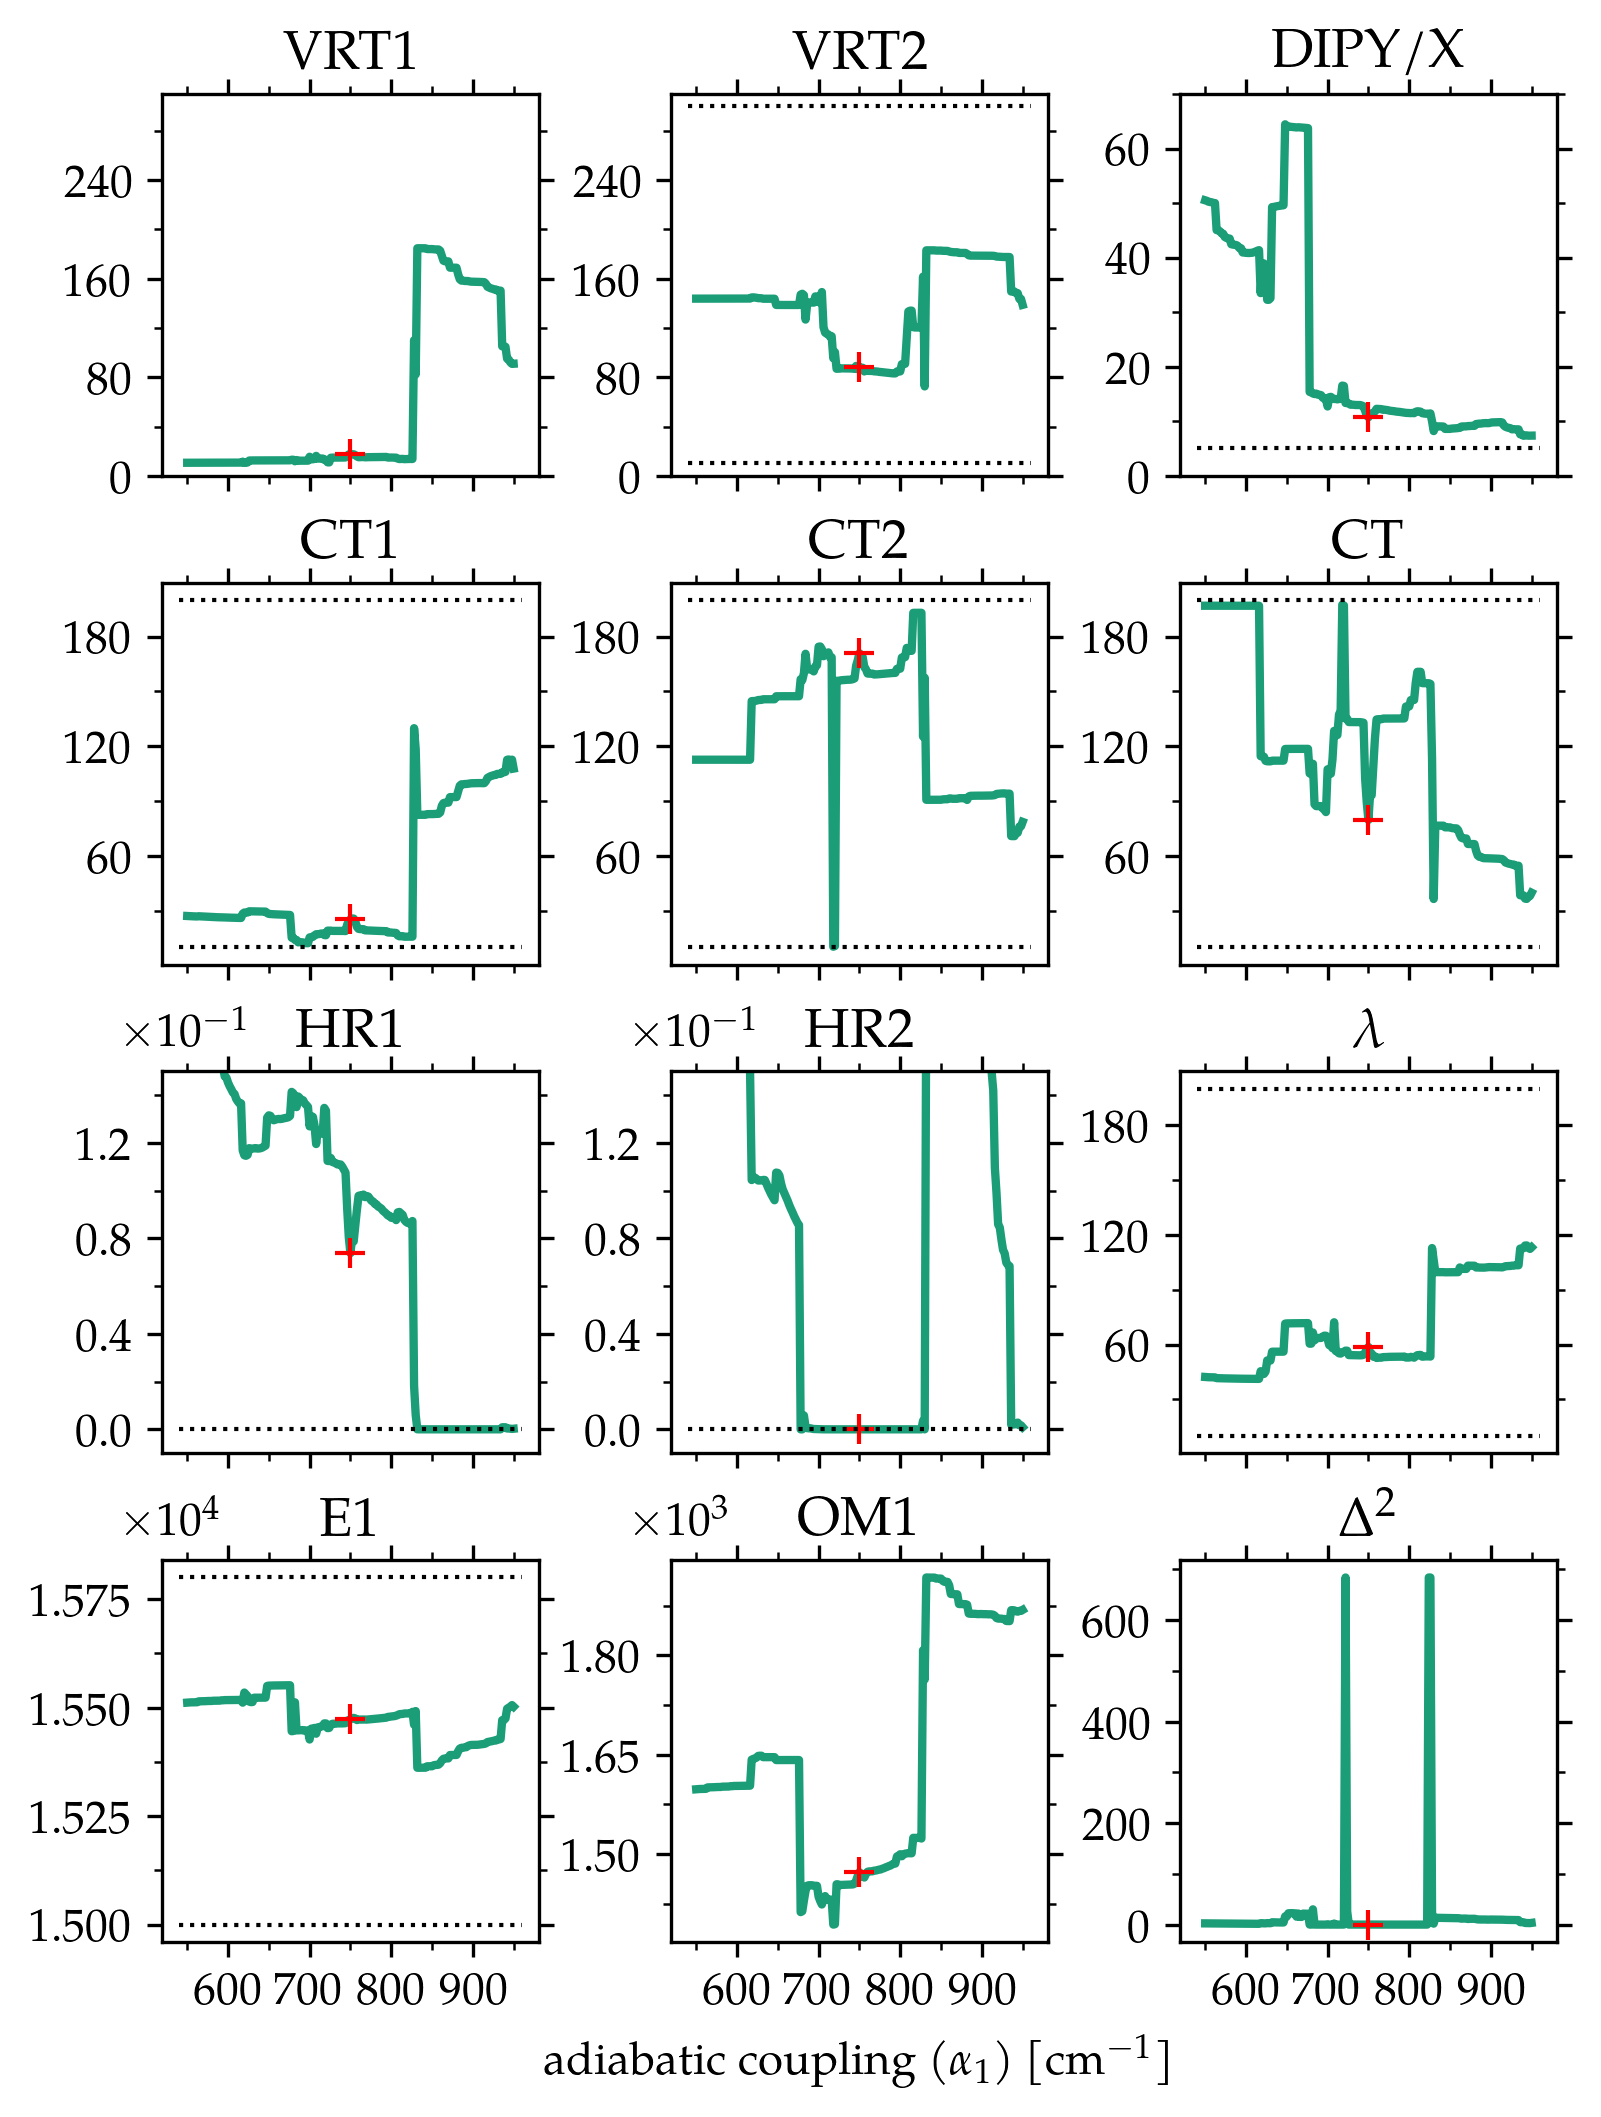

In [10]:
from matplotlib import cm
from spectre.matplotlib_latex import plt_latex, format_ticks

plt_latex()
clm = cm.get_cmap('viridis', len(files))

fig, grid = plt.subplots(4, 3, figsize=(6,8), dpi=300, sharex=True, facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace=0.28, wspace=0.35)

labels = list()

tt11 = list()
tt12 = list()
dipyx = list()
ct11 = list()
ct12 = list()
ct = list()
lamb = list()
hr11 = list()
hr12 = list()
e1 = list()
de = list()
om1 = list()
alpha = list()

for i, f in enumerate(sfiles[:]):
    filepath = os.path.join(path, f)
    optpars = spectre.utils.loadjson(filepath)
    datapath = filepath.replace('.json', '.npy')
    
    if os.path.isfile(datapath):
        data = np.load(datapath)
    else:
        syst, ta = spectre.full.init_system(optpars)
        spec = abss.calculate_abs_spectrum(syst, ta, optpars)
        spec.normalize()
        
        with qr.energy_units('1/cm'):
            data = np.vstack([spec.axis.data, spec.data])
            np.save(datapath, data)

    lab = f.split('.')[0].split('_')[2]
    labels.append(float(lab))

    tt11.append(optpars['scaled_OB_CF_vib_11']['target_time'])
    tt12.append(optpars['scaled_OB_CF_vib_12']['target_time'])
    dipyx.append(4.5**2 / optpars['dipx'][0]**2)
    ct11.append(optpars['scaled_OB_CF_vib_11']['cortime'])
    ct12.append(optpars['scaled_OB_CF_vib_12']['cortime'])
    ct.append(optpars['spectral_density_el']['cortime'])
    lamb.append(optpars['spectral_density_el']['reorg'])
    hr11.append(optpars['hr1'][0])
    hr12.append(optpars['hr1'][1])
    e1.append(optpars['energies'][1])
    de.append(optpars['energies'][2] - optpars['energies'][1])
    om1.append(optpars['omega'][0])
    alpha.append(optpars['dia_alpha1'])

#labels = labels[13:]
ii = [i for i,x in enumerate(labels) if x == 750][0]

### Line & marker parameters
pars = dict(linewidth=2, )
mpars = dict(marker='+', c='r', markersize=7)
lpars = dict(linewidth=1, linestyle='dotted', c='k')


## TT11
grid[0,0].plot(labels, tt11, **pars)
grid[0,0].plot(labels[ii], tt11[ii], **mpars)
grid[0,0].set_title('VRT1')

## TT12
grid[0,1].plot(labels, tt12, **pars)
grid[0,1].plot(labels[ii], tt12[ii], **mpars)
grid[0,1].set_title('VRT2')
draw_line(grid[0,1], labels, 10, 300, **lpars)
          
## DIP Y/X
grid[0,2].plot(labels, dipyx, **pars)
grid[0,2].plot(labels[ii], dipyx[ii], **mpars)
grid[0,2].set_title('DIPY/X')
draw_line(grid[0,2], labels, 4.5**2 / 0.2**2, 4.5**2 / 2**2, **lpars)

## CT11
grid[1,0].plot(labels, ct11, **pars)
grid[1,0].plot(labels[ii], ct11[ii], **mpars)
grid[1,0].set_title('CT1')
draw_line(grid[1,0], labels, 10, 200, **lpars)

## CT12
grid[1,1].plot(labels, ct12, **pars)
grid[1,1].plot(labels[ii], ct12[ii], **mpars)
grid[1,1].set_title('CT2')
draw_line(grid[1,1], labels, 10, 200, **lpars)

## CT
grid[1,2].plot(labels, ct, **pars)
grid[1,2].plot(labels[ii], ct[ii], **mpars)
grid[1,2].set_title('CT')
draw_line(grid[1,2], labels, 10, 200, **lpars)

## HR11
grid[2,0].plot(labels, hr11, **pars)
grid[2,0].plot(labels[ii], hr11[ii], **mpars)
grid[2,0].set_title('HR1')
draw_line(grid[2,0], labels, 0.00001, 0.4, **lpars)

## HR12
grid[2,1].plot(labels, hr12, **pars)
grid[2,1].plot(labels[ii], hr12[ii], **mpars)
grid[2,1].set_title('HR2')
draw_line(grid[2,1], labels, 0.00001, 0.4, **lpars)

## lambda
grid[2,2].plot(labels, lamb, **pars)
grid[2,2].plot(labels[ii], lamb[ii], **mpars)
grid[2,2].set_title(r'$\lambda$')
draw_line(grid[2,2], labels, 10, 200, **lpars)

## e1
grid[3,0].plot(labels, e1, **pars)
grid[3,0].plot(labels[ii], e1[ii], **mpars)
grid[3,0].set_title('E1')
draw_line(grid[3,0], labels, 15000, 15800, **lpars)

## omega
grid[3,1].plot(labels, om1, **pars)
grid[3,1].plot(labels[ii], om1[ii], **mpars)
grid[3,1].set_title('OM1')
#draw_line(grid[3,1], labels, 0.00001, 0.4, **lpars)

# ## alpha
# grid[3,2].plot(labels, alpha, **pars)
# grid[3,2].plot(labels[ii], alpha[ii], **mpars)
# grid[3,2].set_title(r'$\alpha$')
# #draw_line(grid[3,2], labels, 0.00001, 0.4, **lpars)

## alpha
delta = (zax**2).sum(axis=1)
grid[3,2].plot(labels, delta, **pars)
grid[3,2].plot(labels[ii], delta[ii], **mpars)
grid[3,2].set_title(r'$\Delta^2$')
#draw_line(grid[3,2], labels, 0.00001, 0.4, **lpars)
    


grid[0,0].set_ylim(0,310)
grid[0,1].sharey(grid[0,0])
# grid[0,1].set_ylim(0,250)

#grid[1,0].set_ylim(0,100)
grid[1,1].sharey(grid[1,0])
grid[1,2].sharey(grid[1,0])
# grid[1,1].set_ylim(0,100)
# grid[1,2].set_ylim(0,100)

grid[2,0].set_ylim(-0.01, 0.15)
grid[2,1].sharey(grid[2,0])
# grid[2,1].set_ylim(-0.01, 0.075)

#grid[0,0].set_xlim(10, 80)
grid[0,2].set_ylim(0,70)

#plt.xlim(14000, 20000)
#plt.ylim(-0.1, 1.1)
#plt.legend(frameon=False)

#sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(labels[0], labels[-1]))
#cbar = plt.colorbar(sm, orientation='horizontal')
#cbar.set_ticklabels(labs)

### TICKS
from matplotlib.ticker import MultipleLocator, AutoMinorLocator, MaxNLocator

for g in grid[:].flatten():
    pars = dict(labelbottom=False, labeltop=False, labelleft=True, labelright=False,
                bottom=True,           top=True,      left=True,      right=True,)
    #minor_pars = dict(bottom=True,           top=True,      left=True,      right=True)
    g.tick_params(which='both', **pars)
    #g.minor_tick_params(**minor_pars)
    
    g.xaxis.set_major_locator(MultipleLocator(100))
    g.xaxis.set_major_formatter('{x:.0f}')
    g.xaxis.set_minor_locator(MultipleLocator(50))
    g.yaxis.set_major_locator(MaxNLocator(nbins=4))
    g.yaxis.set_minor_locator(AutoMinorLocator(2))
    g.ticklabel_format(style='sci', axis='y', scilimits=(-1,3), useOffset=True)

    g.get_yaxis().set_offset_position("left")
    g.get_yaxis().OFFSETTEXTPAD = 7
    #g.get_yaxis().get_offset_text().set_position((-0.032,0))
    g.get_yaxis().get_offset_text().set_position((-0.097,0))

for g in grid[-1].flatten():
    pars = dict(labelbottom=True, labeltop=False, labelleft=True, labelright=False)
    g.tick_params(which='both', **pars)

# plt.locator_params(axis='x', nbins=4)
# plt.locator_params(axis='y', nbins=4)
#fig.tight_layout()

grid[3,1].set_xlabel(r'adiabatic coupling ($\alpha_1$) [cm$^{-1}$]')